# Explorative Data Analysis
- This is a notebook containing a complete analysis of the data. Both the sales data,customer engagement with the sales.

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [2]:
#load the dataset
file_path = "Salesdata (1).xlsx"

#load all excel sheets
sheets = pd.read_excel(file_path, sheet_name=None)

#print the names of the sheets
print(sheets.keys())

dict_keys(['Main Data', 'Data Dictionary', 'Product Master'])


In [3]:
#access the individual sheets
#main data
main_data = sheets['Main Data']

#product master
product_master = sheets['Product Master']

#data dictionary 
data_dictionary = sheets['Data Dictionary']

## Main Data Table Exploration 

In [4]:
main_data.head()

OrderNumber  QuantityOrdered  PriceEach  OrderLineNumber    Sales   Status  \
0        10100               49      34.47                1  1689.03  Shipped   
1        10100               50      67.80                2  3390.00  Shipped   
2        10100               30     100.00                3  5151.00  Shipped   
3        10100               22      86.51                4  1903.22  Shipped   
4        10101               26     100.00                1  3773.38  Shipped   

   QTR_ID  DAY_ID  MONTH_ID  YEAR_ID  ...              Phone  \
0       1       6         1     2022  ...         6035558647   
1       1       6         1     2022  ...         6035558647   
2       1       6         1     2022  ...         6035558647   
3       1       6         1     2022  ...         6035558647   
4       1       9         1     2022  ...  +49 69 66 90 2555   

               AddressLine1       City PostalCode  Country Territory  \
0  2304 Long Airport Avenue     Nashua      62005      USA       NaN   
1  2304 Long Airport Avenue     Nashua      62005      USA       NaN   
2  2304 Long Airport Avenue     Nashua      62005      USA       NaN   
3  2304 Long Airport Avenue     Nashua      62005      USA       NaN   
4             Lyonerstr. 34  Frankfurt      60528  Germany      EMEA   

  ContactLastName ContactFirstName       Branch CostPrice  
0           Young          Valarie  Skates Road   22.4055  
1           Young          Valarie  Bergenville   44.0700  
2           Young          Valarie  Bergenville   65.0000  
3           Young          Valarie  Skates Road   56.2315  
4          Keitel           Roland  Bergenville   65.0000  

[5 rows x 22 columns]

In [5]:
#explore this table 
print("Shape of the main data table: ")
print(f'Main data has {main_data.shape[0]} rows and {main_data.shape[1]} columns\n')
print("Main Data Info:", main_data.info())


Shape of the main data table: 
Main data has 2823 rows and 22 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       2823 non-null   int64  
 1   QuantityOrdered   2823 non-null   int64  
 2   PriceEach         2823 non-null   float64
 3   OrderLineNumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Status            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   DAY_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  ProductCode       2823 non-null   object 
 11  CustomerName      2823 non-null   object 
 12  Phone             2823 non-null   object 
 13  AddressLine1      2823 non-null   object 
 14  City              2823 non-null   object 
 15  PostalCode        

- From the above information, we can see that all the columns have the right data types. 
- We go ahead to check for missing values.

### Missing Values 

In [6]:
#check for missing values
print("Missing values : ", main_data.isna().sum().sort_values(ascending=False))

Missing values :  Territory           1074
PostalCode            76
OrderNumber            0
QuantityOrdered        0
Branch                 0
ContactFirstName       0
ContactLastName        0
Country                0
City                   0
AddressLine1           0
Phone                  0
CustomerName           0
ProductCode            0
YEAR_ID                0
MONTH_ID               0
DAY_ID                 0
QTR_ID                 0
Status                 0
Sales                  0
OrderLineNumber        0
PriceEach              0
CostPrice              0
dtype: int64


- The Territory column has the most missing values followed by the Postal Code column.

In [7]:
main_data['Territory'].value_counts()

Territory
EMEA     1407
APAC      221
Japan     121
Name: count, dtype: int64

- For the Territories:
- EMEA: This is the Europe, the Middle East, and African region.
- APAC: stands for the Asia and Pacific region.
- Then Japan.
 To maintain the integrity of the table, let's replace the null values with 'Unknown'. This is because the sale can either fall in the region already defined or be a part of the undefined regions such as Latin America or North America.

In [8]:
#replace the null values in the Territory column with 'Unknown'
main_data['Territory'].fillna('Unknown', inplace=True)

#check the unique values in the Territory column
main_data['Territory'].value_counts()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1765881198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data['Territory'].fillna('Unknown', inplace=True)


Territory
EMEA       1407
Unknown    1074
APAC        221
Japan       121
Name: count, dtype: int64

- Unto to the Postal Code column 

In [9]:
main_data['PostalCode'].value_counts()

PostalCode
28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: count, Length: 73, dtype: int64

- Do the same with Postal Code column and replace the missing values with unknown. We want to maintain the integrity of our data.

In [10]:
#fill the missing values in the PostalCode column with the 'Unknown' value
main_data['PostalCode'].fillna('Unknown', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1362341881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data['PostalCode'].fillna('Unknown', inplace=True)


In [11]:
#confirm that there are no missing values in the columns
print("Missing values : ", sum(main_data.isna().sum()))

Missing values :  0


## Check for Duplicates


In [12]:
main_data.duplicated().sum()

0

- Since there are no duplicates we can go ahead to perform the univariate analysis.

## The Product Mater Table

In [13]:
product_master.head()

ProductLine ProductCode  MSRP
0  Classic Cars    S10_1949   214
1  Classic Cars    S10_4757   136
2  Classic Cars    S10_4962   147
3  Classic Cars    S12_1099   194
4  Classic Cars    S12_1108   207

In [14]:
#check for missing values
print("Missing values : ", sum(product_master.isna().sum()))

#check for duplicates
print("Duplicates : ", product_master.duplicated().sum())

Missing values :  0
Duplicates :  0


- Since there are no duplicates in the second table we can easily merge the two tables.


In [15]:
combined_data = pd.merge(main_data, product_master, on='ProductCode', how='inner')
combined_data.head()

OrderNumber  QuantityOrdered  PriceEach  OrderLineNumber    Sales   Status  \
0        10100               49      34.47                1  1689.03  Shipped   
1        10100               50      67.80                2  3390.00  Shipped   
2        10100               30     100.00                3  5151.00  Shipped   
3        10100               22      86.51                4  1903.22  Shipped   
4        10101               26     100.00                1  3773.38  Shipped   

   QTR_ID  DAY_ID  MONTH_ID  YEAR_ID  ...       City PostalCode  Country  \
0       1       6         1     2022  ...     Nashua      62005      USA   
1       1       6         1     2022  ...     Nashua      62005      USA   
2       1       6         1     2022  ...     Nashua      62005      USA   
3       1       6         1     2022  ...     Nashua      62005      USA   
4       1       9         1     2022  ...  Frankfurt      60528  Germany   

  Territory ContactLastName ContactFirstName       Branch CostPrice  \
0   Unknown           Young          Valarie  Skates Road   22.4055   
1   Unknown           Young          Valarie  Bergenville   44.0700   
2   Unknown           Young          Valarie  Bergenville   65.0000   
3   Unknown           Young          Valarie  Skates Road   56.2315   
4      EMEA          Keitel           Roland  Bergenville   65.0000   

    ProductLine MSRP  
0  Vintage Cars   41  
1  Vintage Cars   60  
2  Vintage Cars  170  
3  Vintage Cars   92  
4  Vintage Cars  168  

[5 rows x 24 columns]

## Univariate analysis

In [16]:
combined_data.columns

Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'DAY_ID', 'MONTH_ID', 'YEAR_ID',
       'ProductCode', 'CustomerName', 'Phone', 'AddressLine1', 'City',
       'PostalCode', 'Country', 'Territory', 'ContactLastName',
       'ContactFirstName', 'Branch', 'CostPrice', 'ProductLine', 'MSRP'],
      dtype='object')

In [17]:
combined_data.describe()

OrderNumber  QuantityOrdered    PriceEach  OrderLineNumber  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              Sales       QTR_ID       DAY_ID     MONTH_ID     YEAR_ID  \
count   2823.000000  2823.000000  2823.000000  2823.000000  2823.00000   
mean    3553.889072     2.717676    14.291534     7.092455  2022.81509   
std     1841.865106     1.203878     8.777409     3.656633     0.69967   
min      482.130000     1.000000     1.000000     1.000000  2022.00000   
25%     2203.430000     2.000000     6.000000     4.000000  2022.00000   
50%     3184.800000     3.000000    14.000000     8.000000  2023.00000   
75%     4508.000000     4.000000    21.000000    11.000000  2023.00000   
max    14082.800000     4.000000    31.000000    12.000000  2024.00000   

         CostPrice         MSRP  
count  2823.000000  2823.000000  
mean     54.378054   100.715551  
std      13.113280    40.187912  
min      17.472000    33.000000  
25%      44.759000    68.000000  
50%      62.205000    99.000000  
75%      65.000000   124.000000  
max      65.000000   214.000000

In [18]:
#write a function to plot the distribution of the numerical columns 
def plot_distribution(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[column], kde=True)
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.axvline(combined_data[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(combined_data[column].median(), color='green', linestyle='--', label='Median')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.legend()
    plt.show()


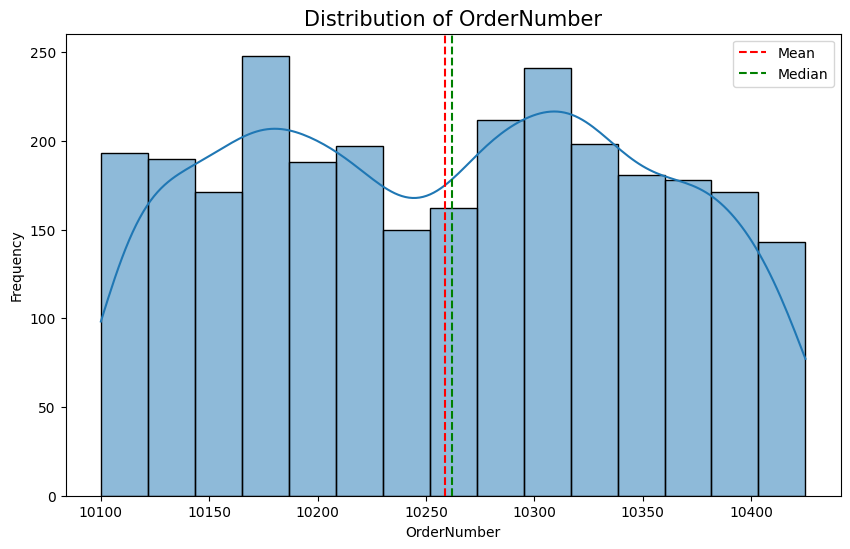

Mean:  10258.725115125753
Median:  10262.0
Order number with the highest count:  10386


In [19]:
#apply the function to the numerical columns
plot_distribution('OrderNumber')
print("Mean: ", combined_data['OrderNumber'].mean())
print("Median: ", combined_data['OrderNumber'].median())
#print the order number with the highest count
print("Order number with the highest count: ", combined_data['OrderNumber'].value_counts().idxmax())


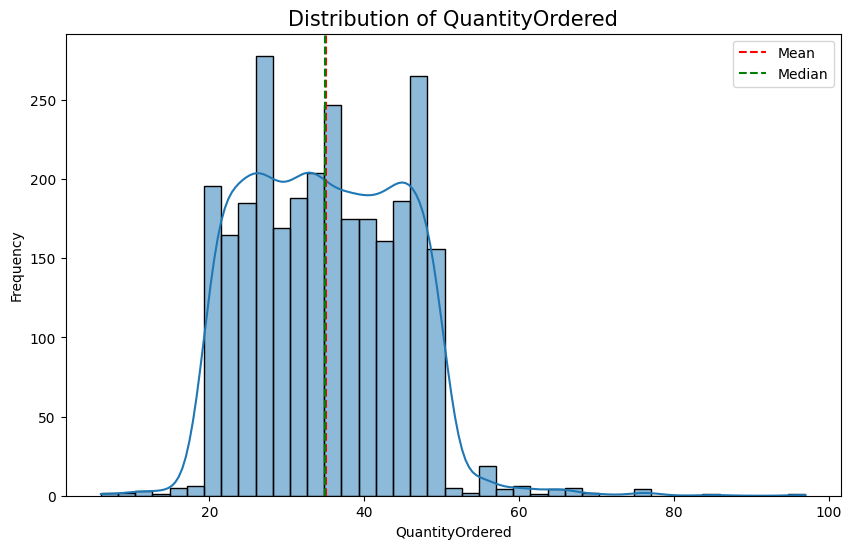

Mean:  35.09280906836698
Median:  35.0
Quantity ordered the most:  34


In [20]:
#quantity ordered distribution
plot_distribution('QuantityOrdered')
print("Mean: ", combined_data['QuantityOrdered'].mean())
print("Median: ", combined_data['QuantityOrdered'].median())
print("Quantity ordered the most: ", combined_data['QuantityOrdered'].value_counts().idxmax())

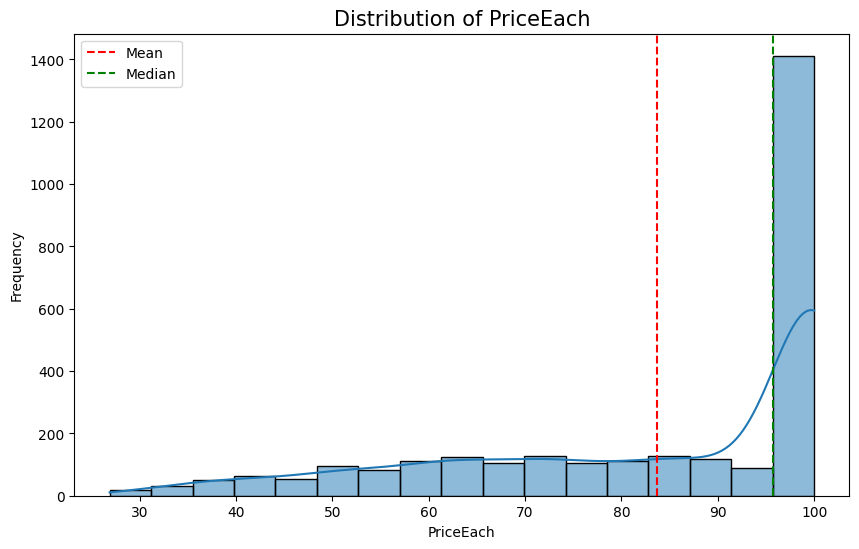

Mean:  83.65854410201912
Median:  95.7
Price each the most:  100.0


In [21]:
#do the same for the other numerical columns
plot_distribution('PriceEach')
print("Mean: ", combined_data['PriceEach'].mean())
print("Median: ", combined_data['PriceEach'].median())
print("Price each the most: ", combined_data['PriceEach'].value_counts().idxmax())


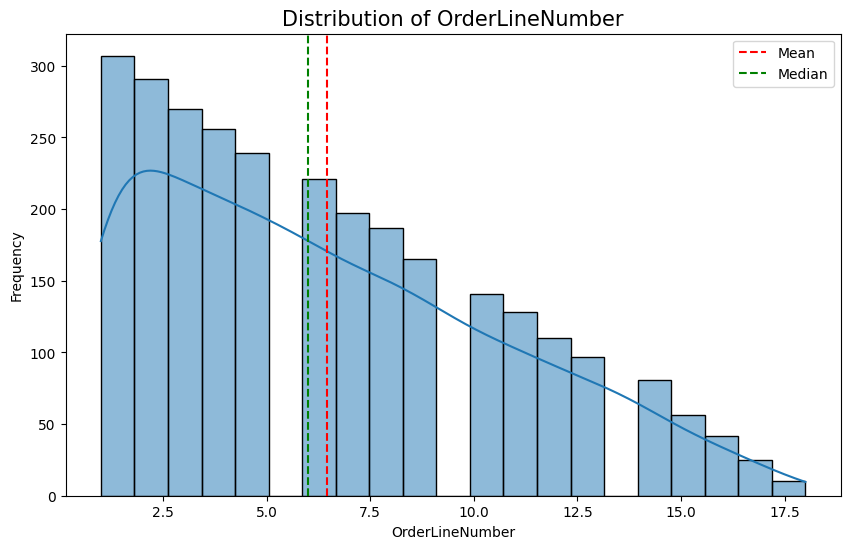

Mean:  6.466170740347148
Median:  6.0
Order Line Number the most:  1


In [22]:
plot_distribution('OrderLineNumber')
print("Mean: ", combined_data['OrderLineNumber'].mean())
print("Median: ", combined_data['OrderLineNumber'].median())
print("Order Line Number the most: ", combined_data['OrderLineNumber'].value_counts().idxmax())


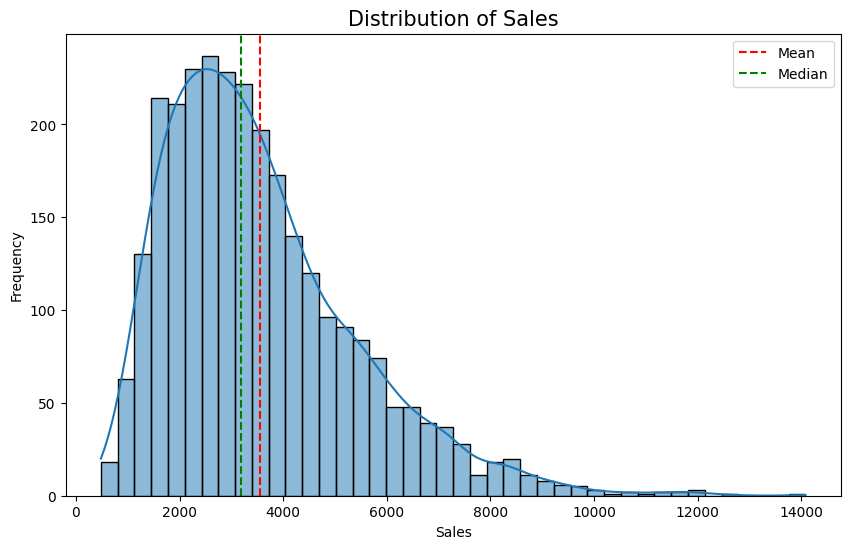

Mean:  3553.889071909316
Median:  3184.8
Most Sales:  3003.0


In [23]:
plot_distribution('Sales')  
print("Mean: ", combined_data['Sales'].mean())
print("Median: ", combined_data['Sales'].median())
print("Most Sales: ", combined_data['Sales'].value_counts().idxmax())


In [24]:
numerical_columns = [ column for column in combined_data.columns if combined_data[column].dtype != 'object']
numerical_columns


['OrderNumber',
 'QuantityOrdered',
 'PriceEach',
 'OrderLineNumber',
 'Sales',
 'QTR_ID',
 'DAY_ID',
 'MONTH_ID',
 'YEAR_ID',
 'CostPrice',
 'MSRP']

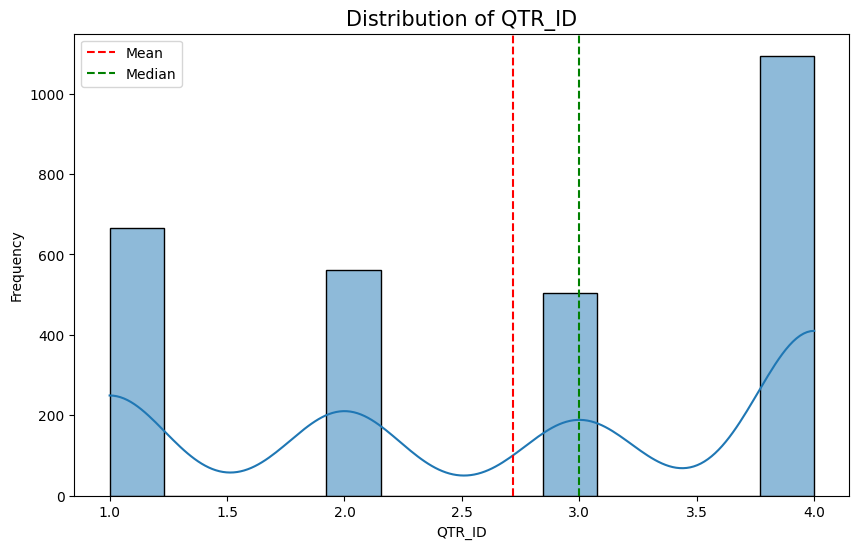

Mean:  2.7176762309599716
Median:  3.0
QTR_ID with highest frequency:  4


In [25]:
plot_distribution('QTR_ID')
print("Mean: ", combined_data['QTR_ID'].mean())
print("Median: ", combined_data['QTR_ID'].median())
print("QTR_ID with highest frequency: ", combined_data['QTR_ID'].value_counts().idxmax())



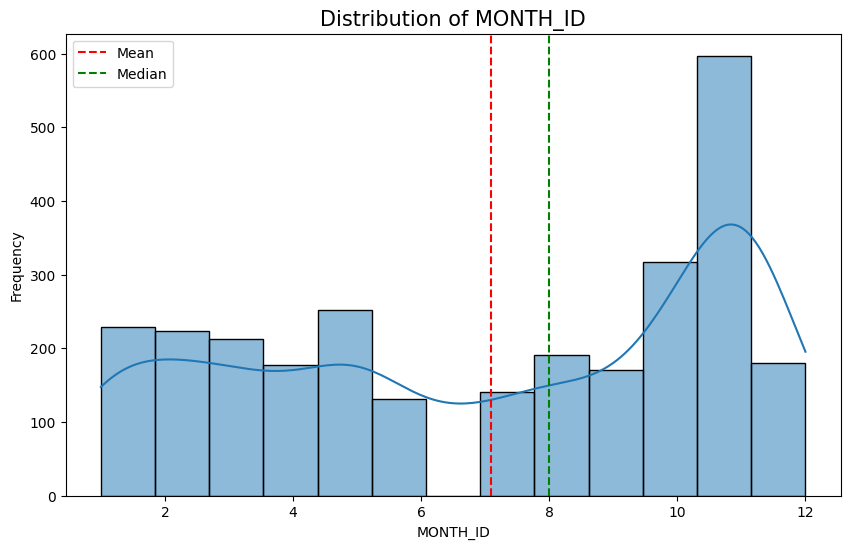

Mean:  7.0924548352816155
Median:  8.0
MONTH_ID with highest frequency :  11


In [26]:
plot_distribution('MONTH_ID')
print("Mean: ", combined_data['MONTH_ID'].mean())
print("Median: ", combined_data['MONTH_ID'].median())
print("MONTH_ID with highest frequency : ", combined_data['MONTH_ID'].value_counts().idxmax())

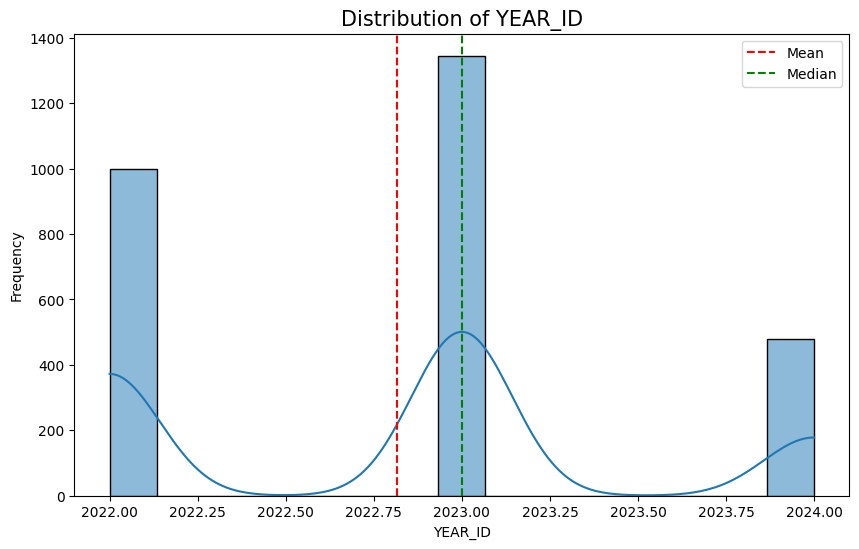

Mean:  2022.8150903294368
Median:  2023.0
YEAR_ID with highest frequency :  2023


In [27]:
plot_distribution('YEAR_ID')
print("Mean: ", combined_data['YEAR_ID'].mean())
print("Median: ", combined_data['YEAR_ID'].median())
print("YEAR_ID with highest frequency : ", combined_data['YEAR_ID'].value_counts().idxmax())



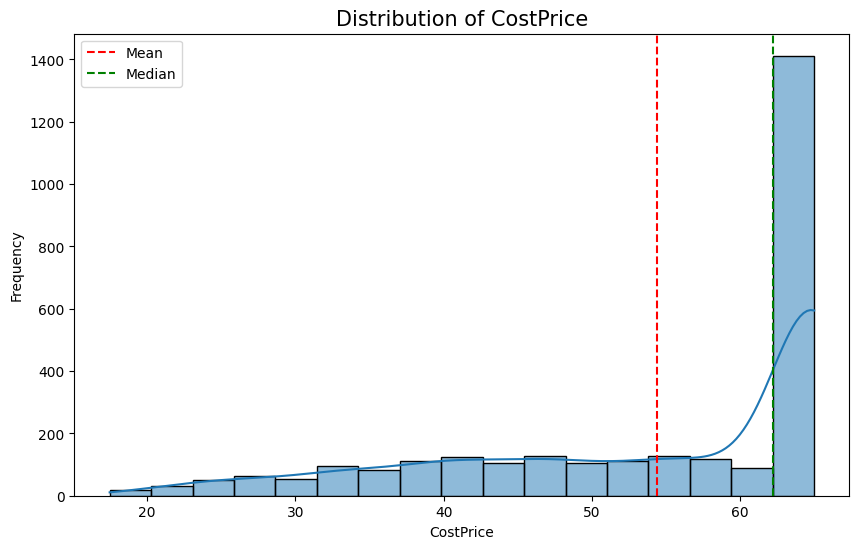

Mean:  54.37805366631244
Median:  62.205
CostPrice with highest frequency :  65.0


In [28]:
plot_distribution('CostPrice')
print("Mean: ", combined_data['CostPrice'].mean())
print("Median: ", combined_data['CostPrice'].median())
print("CostPrice with highest frequency : ", combined_data['CostPrice'].value_counts().idxmax())

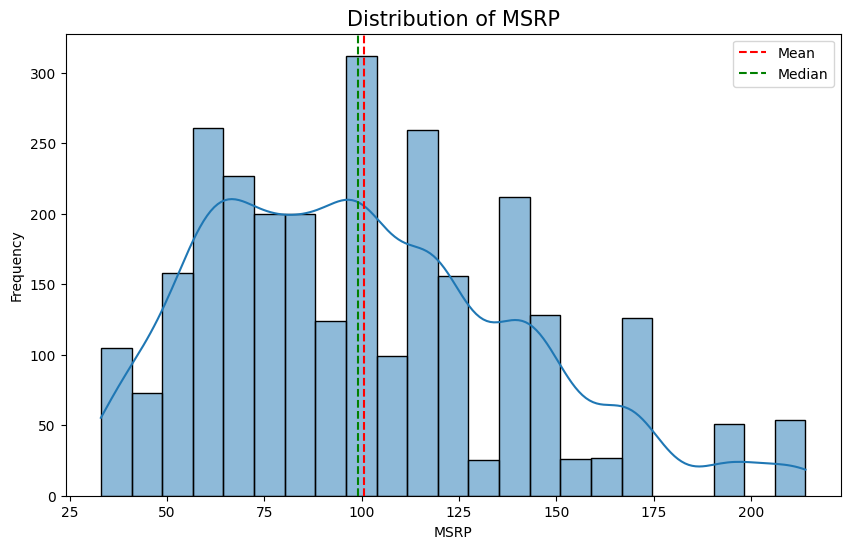

Mean:  100.71555083244775
Median:  99.0
MSRP with highest frequency :  118


In [29]:
plot_distribution('MSRP')
print("Mean: ", combined_data['MSRP'].mean())
print("Median: ", combined_data['MSRP'].median())
print("MSRP with highest frequency : ", combined_data['MSRP'].value_counts().idxmax())

### Combining the Last Name and First Name to column Customer Name

In [30]:
#combine Contact LastName and FirstName into a single column 'CustomerName' and drop the original columns
combined_data['ContactName'] = combined_data['ContactFirstName'] + ' ' + combined_data['ContactLastName']


In [31]:
combined_data.drop(['ContactFirstName', 'ContactLastName'], axis=1, inplace=True)

In [32]:
combined_data.columns

Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'DAY_ID', 'MONTH_ID', 'YEAR_ID',
       'ProductCode', 'CustomerName', 'Phone', 'AddressLine1', 'City',
       'PostalCode', 'Country', 'Territory', 'Branch', 'CostPrice',
       'ProductLine', 'MSRP', 'ContactName'],
      dtype='object')

In [33]:
#write a function to plot the count of each category in a categorical column
def plot_count(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=combined_data, x=column, order=combined_data[column].value_counts().index)
    plt.title(f'Count of each category in {column}', fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


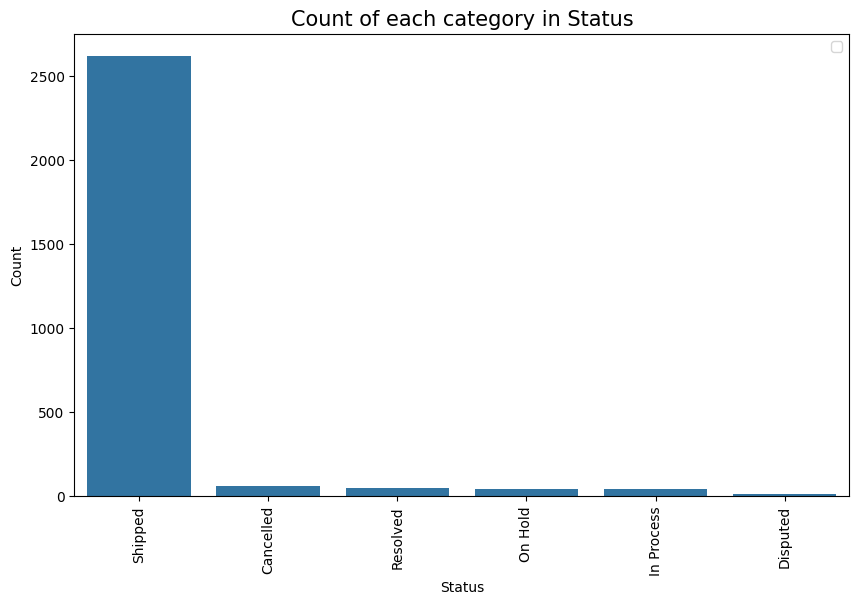

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


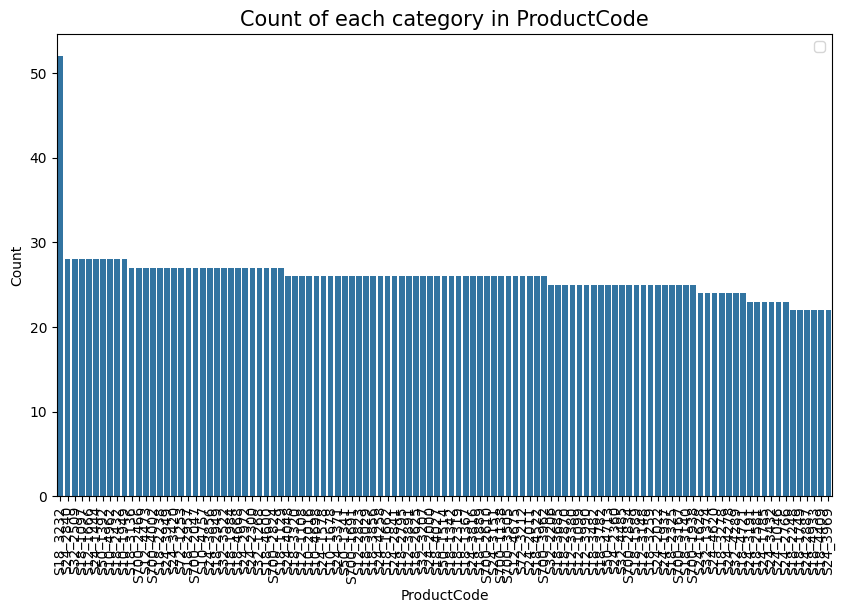

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


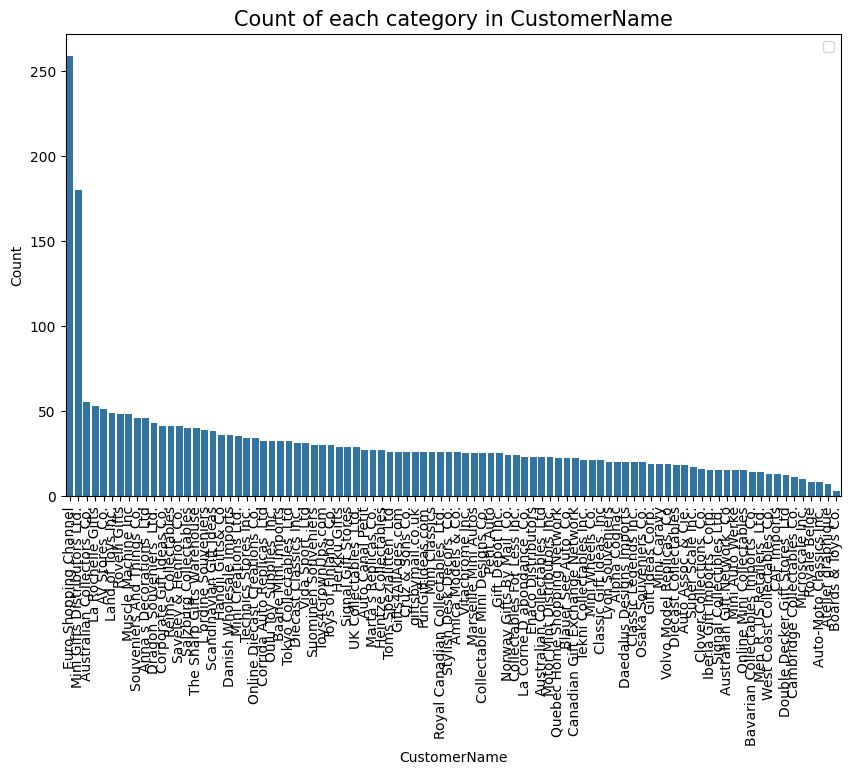

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


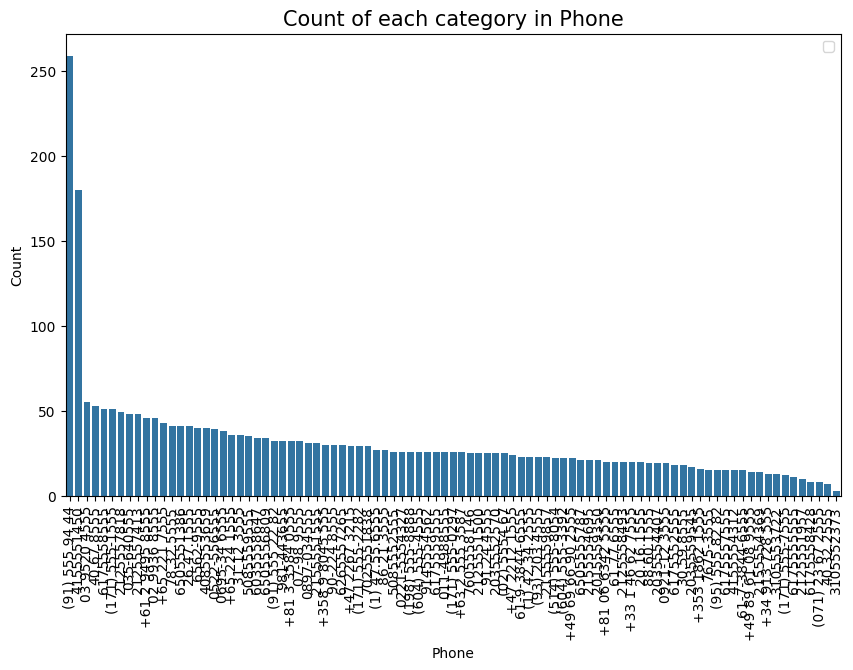

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


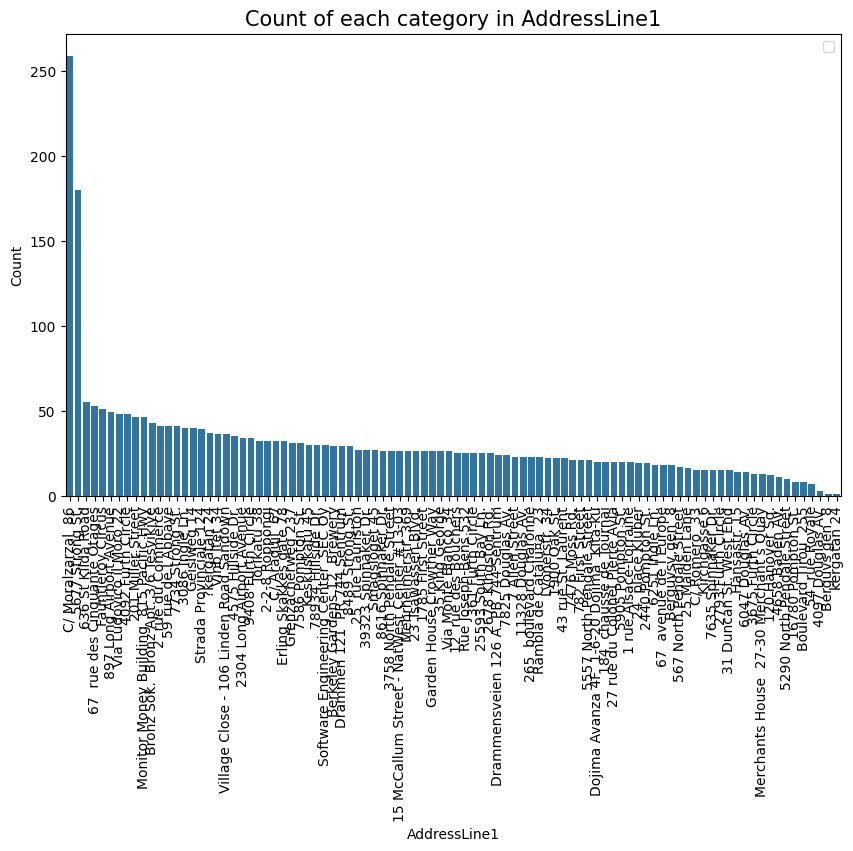

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


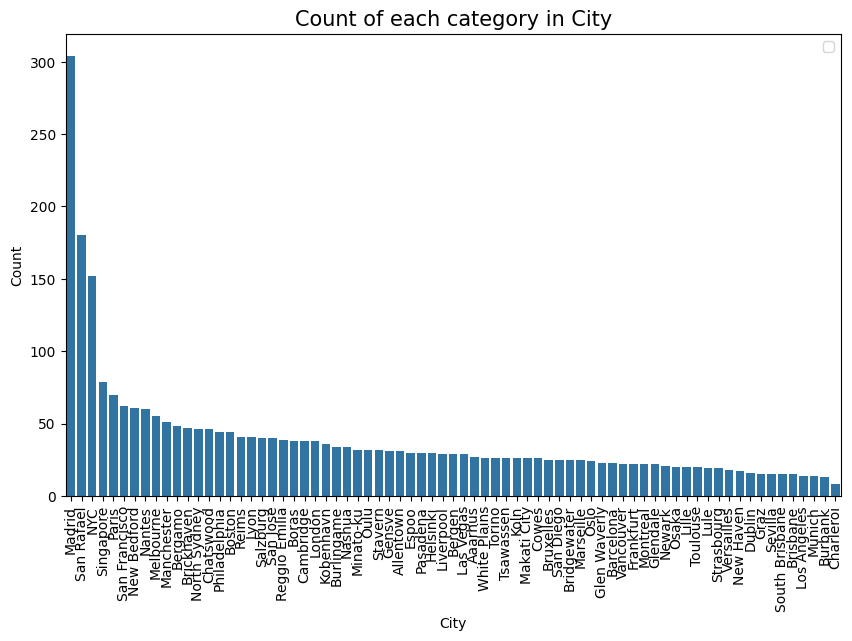

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


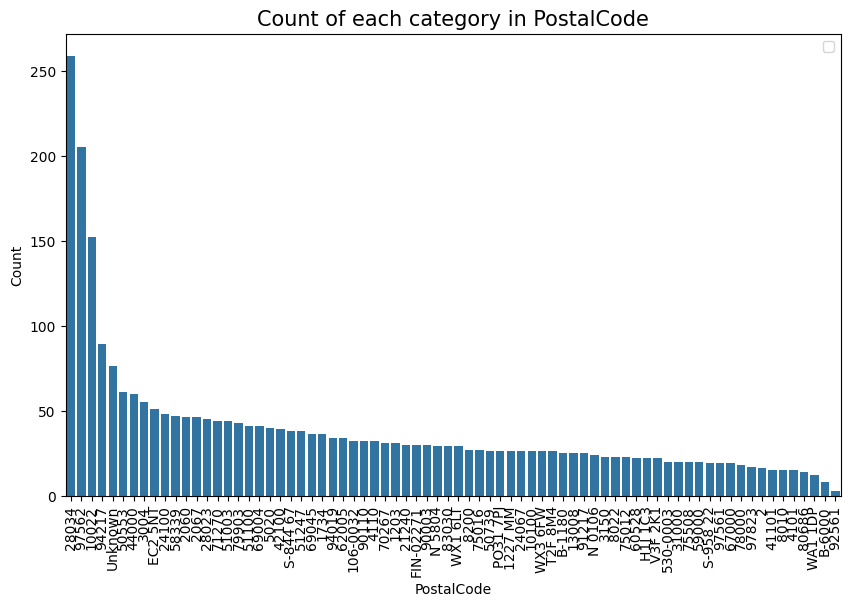

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


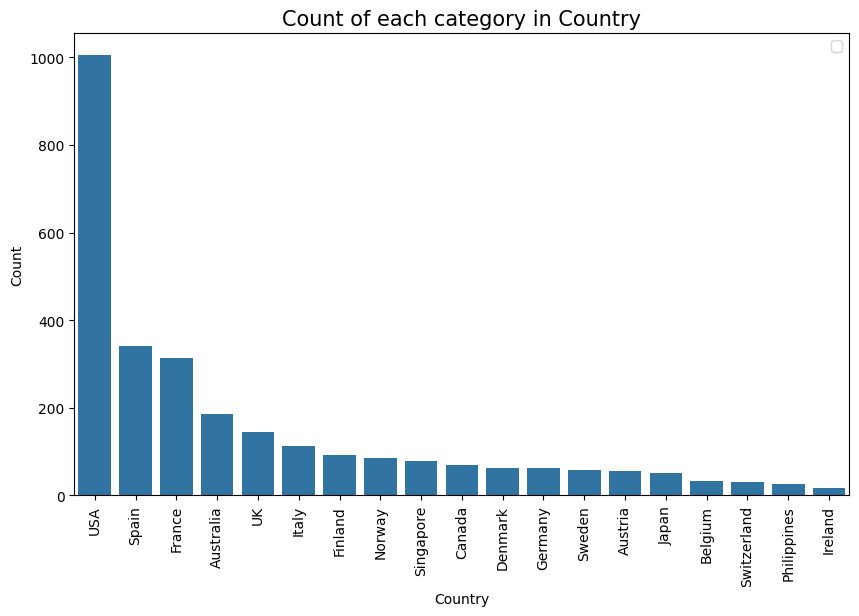

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


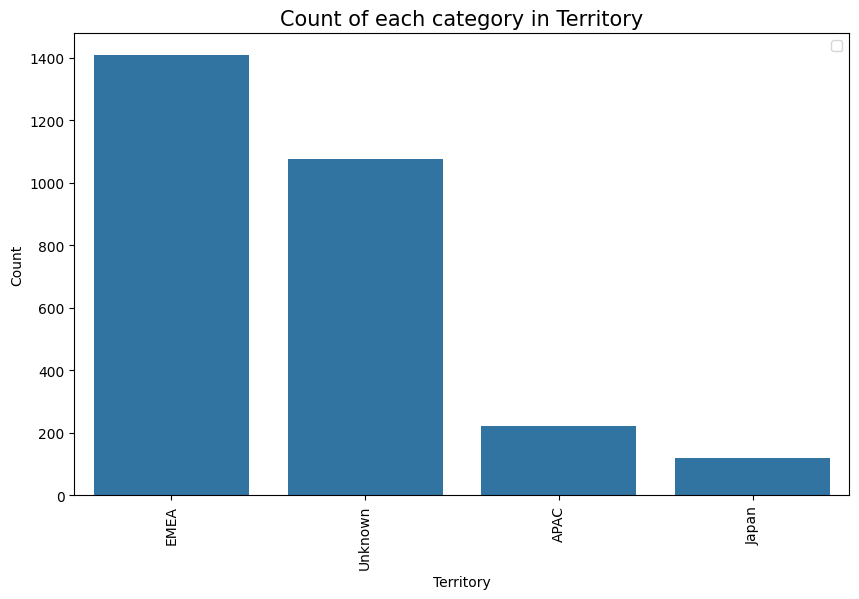

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


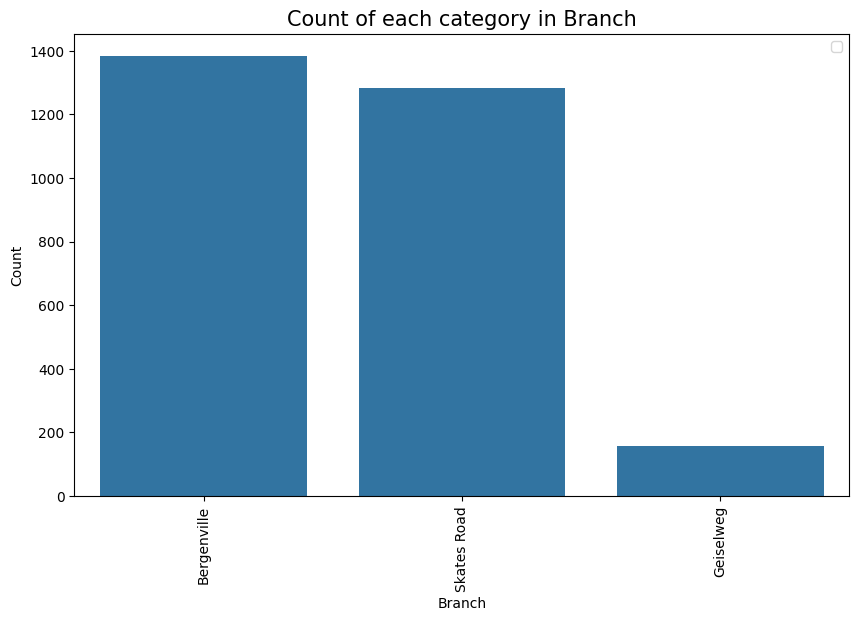

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


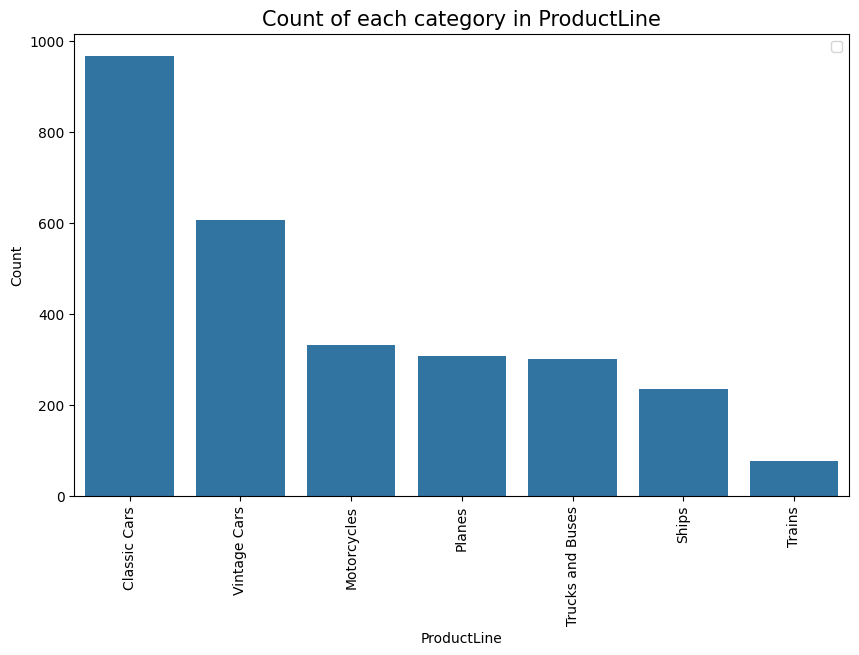

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\524300661.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


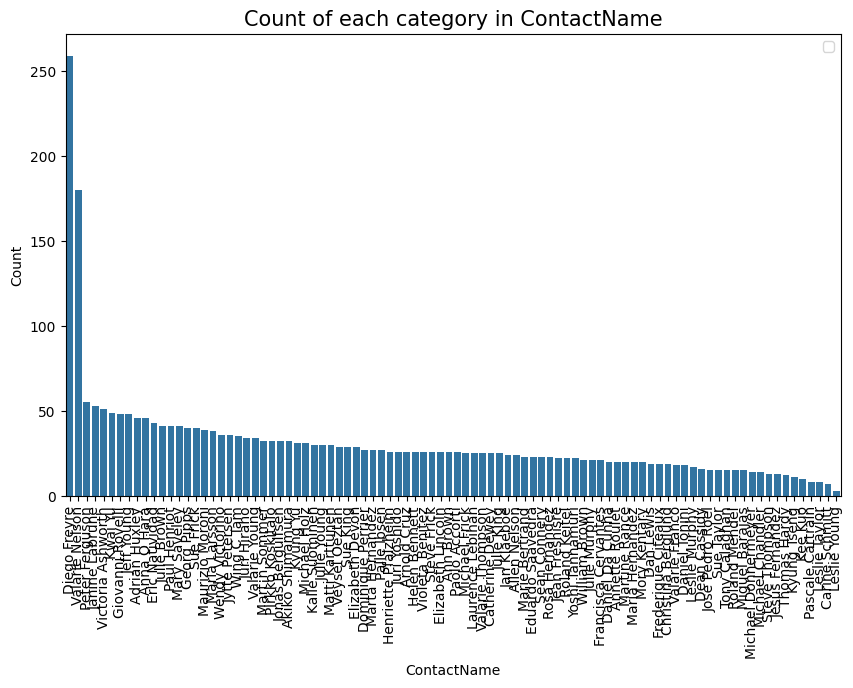

In [34]:
#apply the function to the categorical columns
categorical_columns = [ column for column in combined_data.columns if combined_data[column].dtype == 'object']
#apply the function for each column
for column in categorical_columns:
    plot_count(column)
    

## Bivariate Analysis

- Check the  correlation between the numerical columns and the target column sales.

In [35]:
#correlation btwn the numerical columns and the target variable sales
correlation = combined_data[numerical_columns].corr()['Sales'].sort_values(ascending=False)
correlation


Sales              1.000000
CostPrice          0.657841
PriceEach          0.657841
MSRP               0.635239
QuantityOrdered    0.551426
OrderNumber        0.039919
YEAR_ID            0.035647
QTR_ID            -0.006796
MONTH_ID          -0.009605
DAY_ID            -0.032837
OrderLineNumber   -0.058400
Name: Sales, dtype: float64

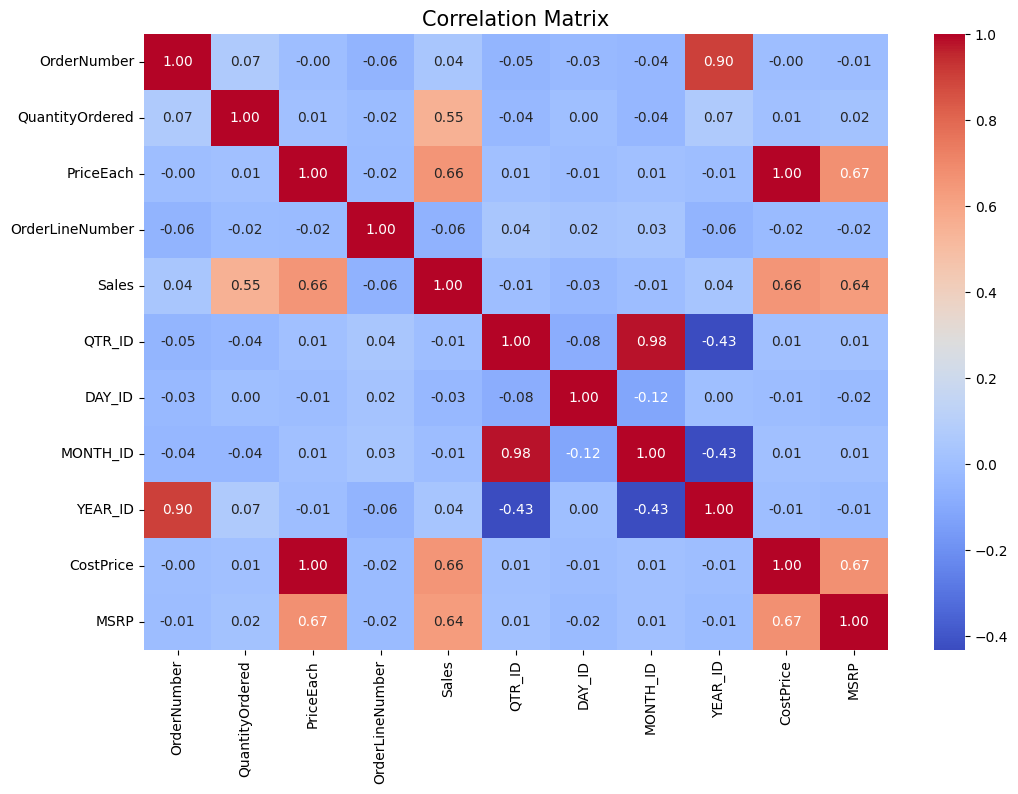

In [36]:
#plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)
plt.show()


In [ ]:
#get columns with correlation greater than 0.5 then get the bivariate analysis with the target variable
high_correlation = correlation[correlation > 0.5].index
high_correlation

Index(['Sales', 'CostPrice', 'PriceEach', 'MSRP', 'QuantityOrdered'], dtype='object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1515390954.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


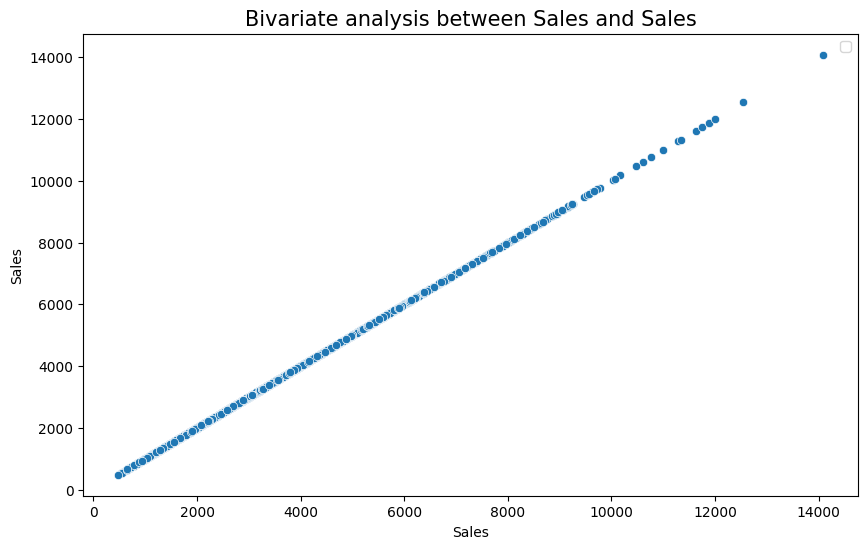

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1515390954.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


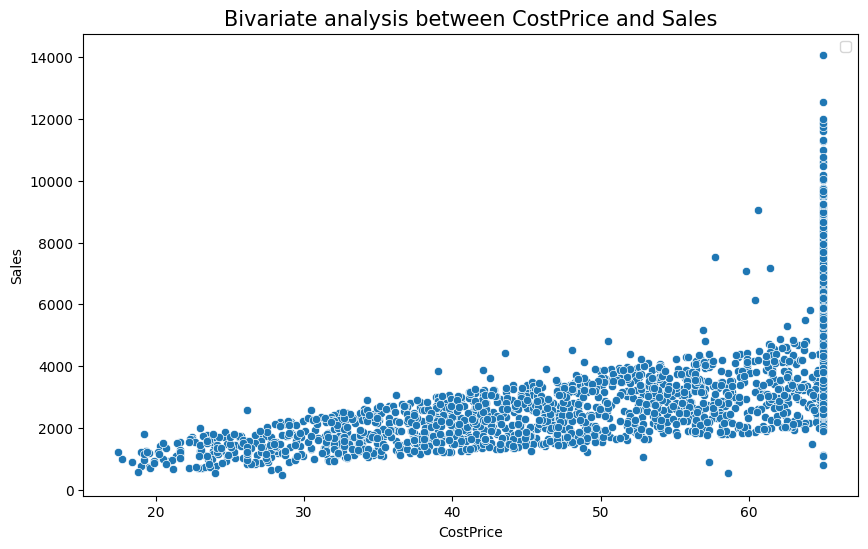

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1515390954.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


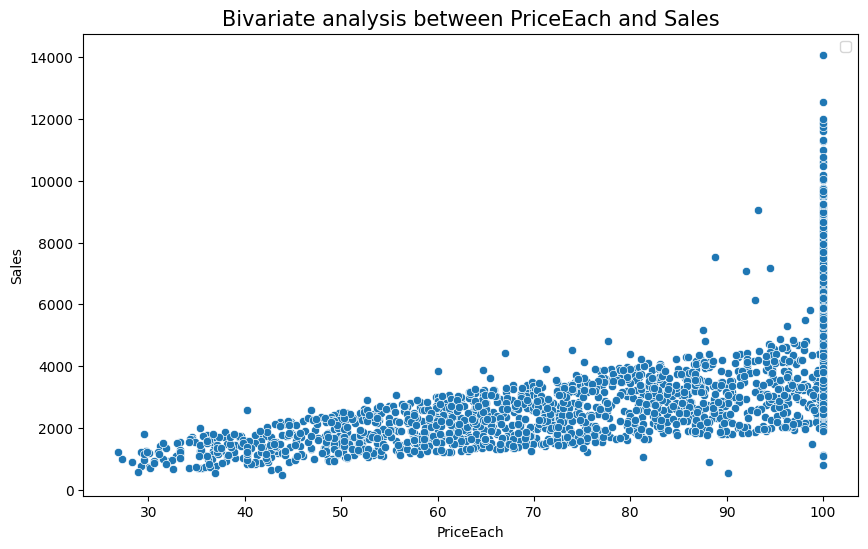

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1515390954.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


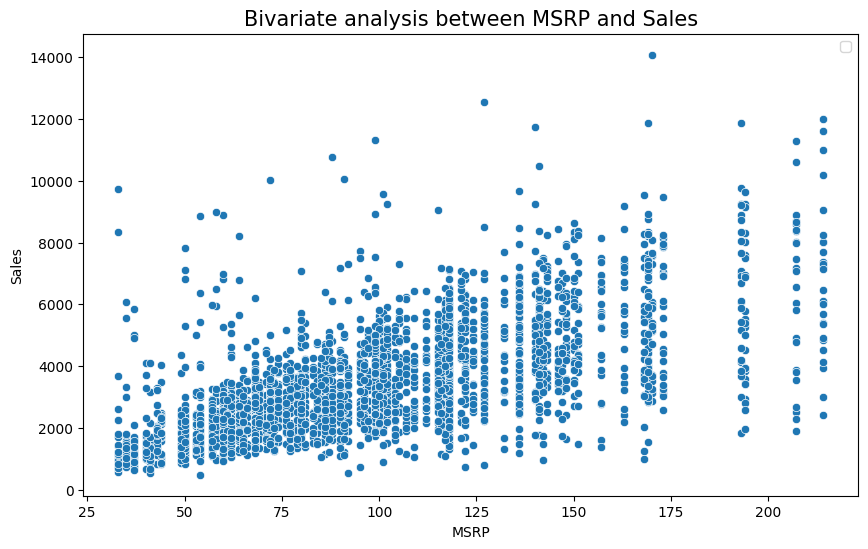

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1515390954.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


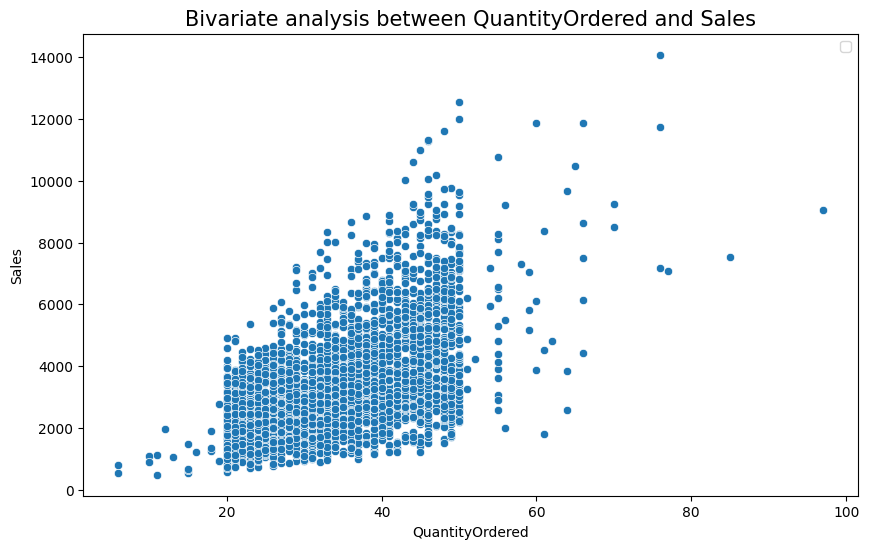

In [38]:
#write a function to plot the bivariate analysis between the target variable and the numerical columns
def plot_bivariate(column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=combined_data, x=column, y='Sales')
    plt.title(f'Bivariate analysis between {column} and Sales', fontsize=15)
    plt.ylabel('Sales')
    plt.xlabel(column)
    plt.legend()
    plt.show()

#apply the function to the columns with high correlation
for column in high_correlation:
    plot_bivariate(column)

- From the Sales comparison we see that, the higher the 

- Bivariate analysis between the categorical column and the target column 

### Categorical Columns and Sales

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


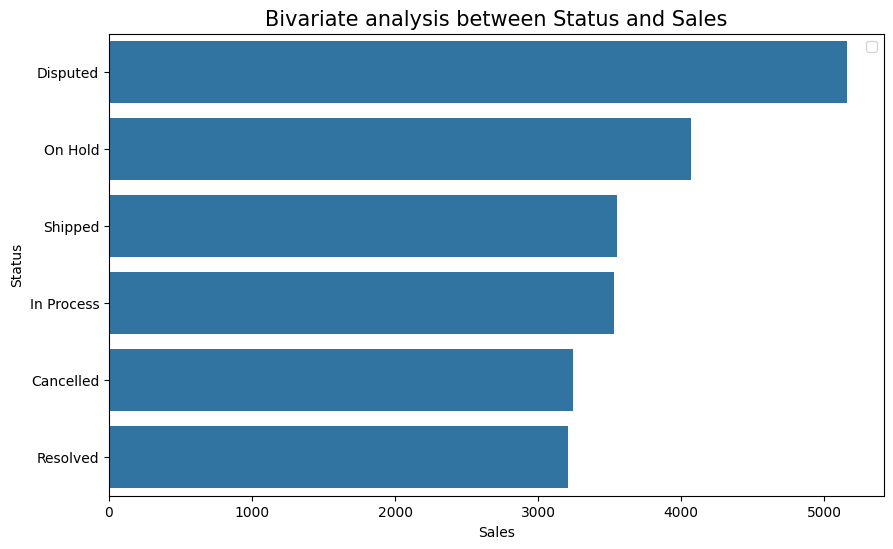

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


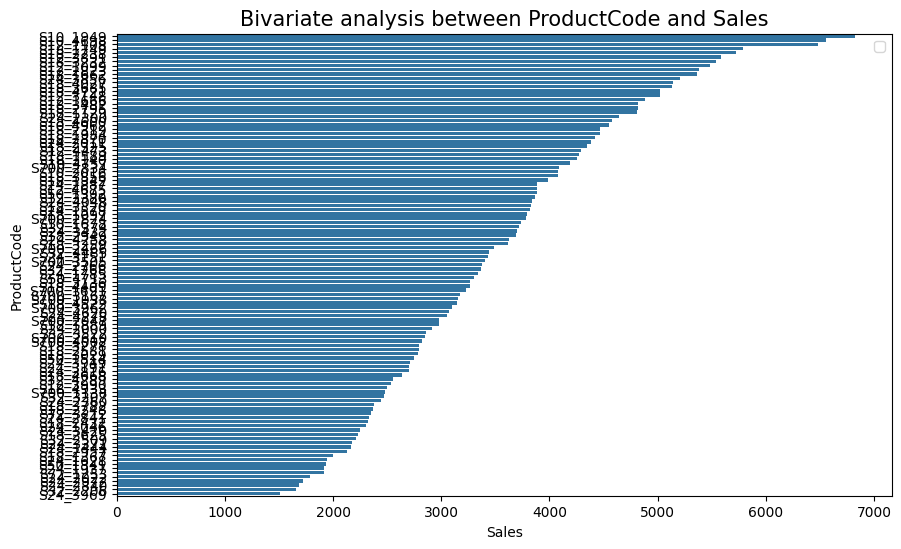

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


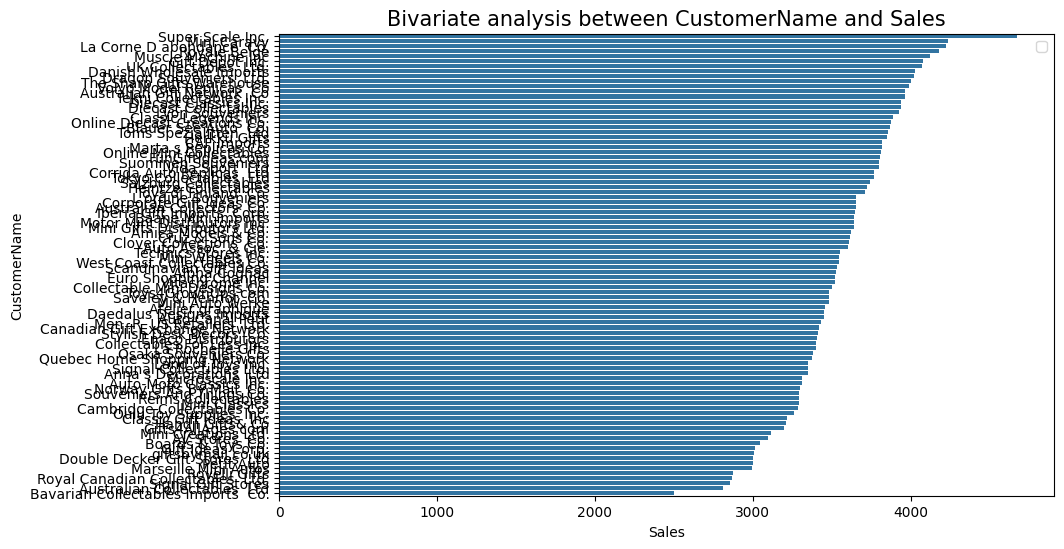

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


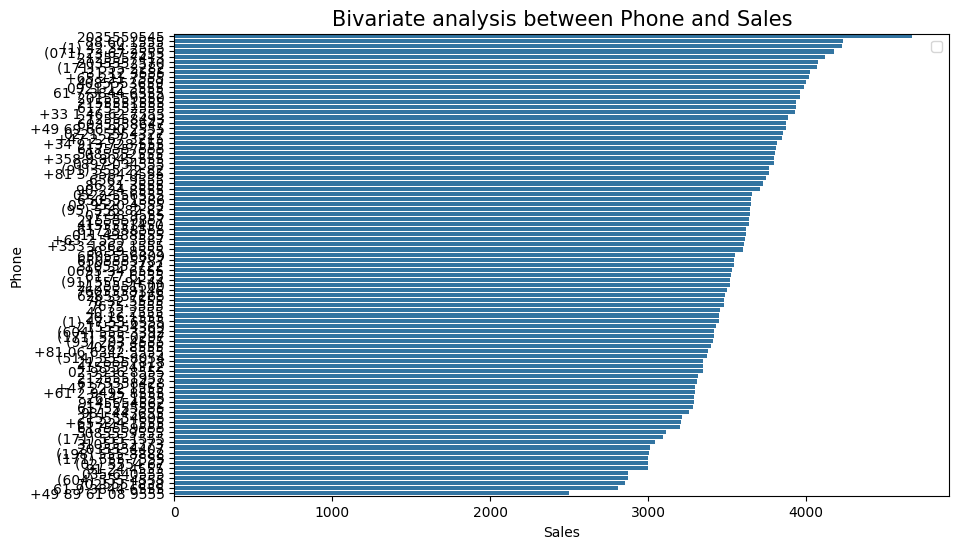

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


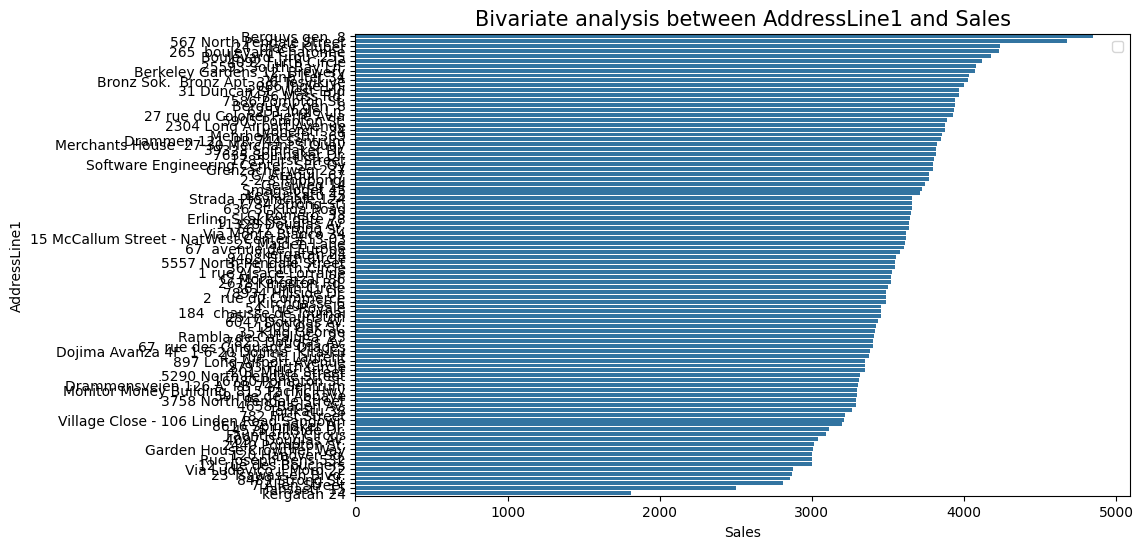

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


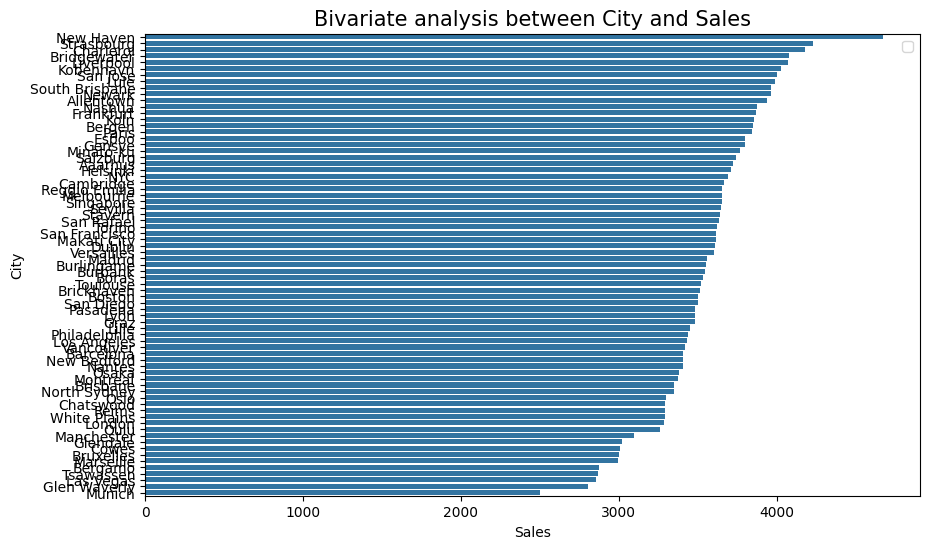

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


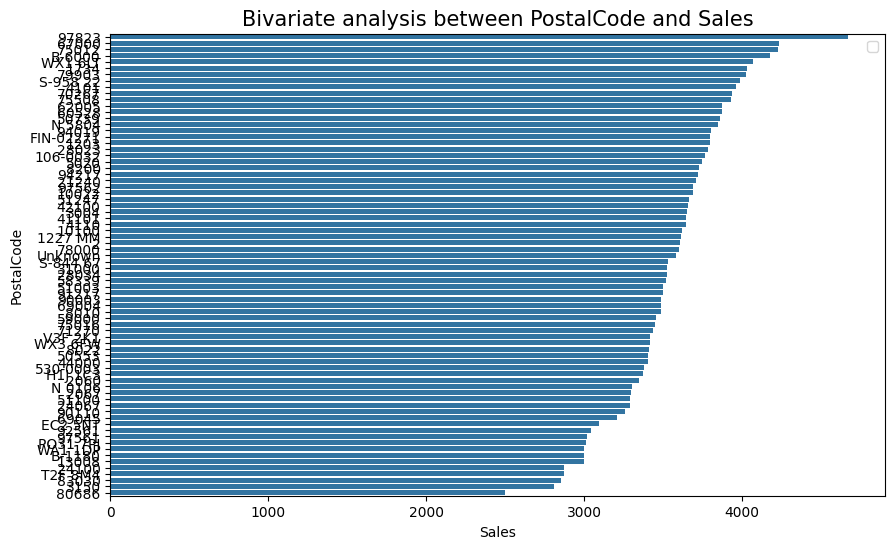

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


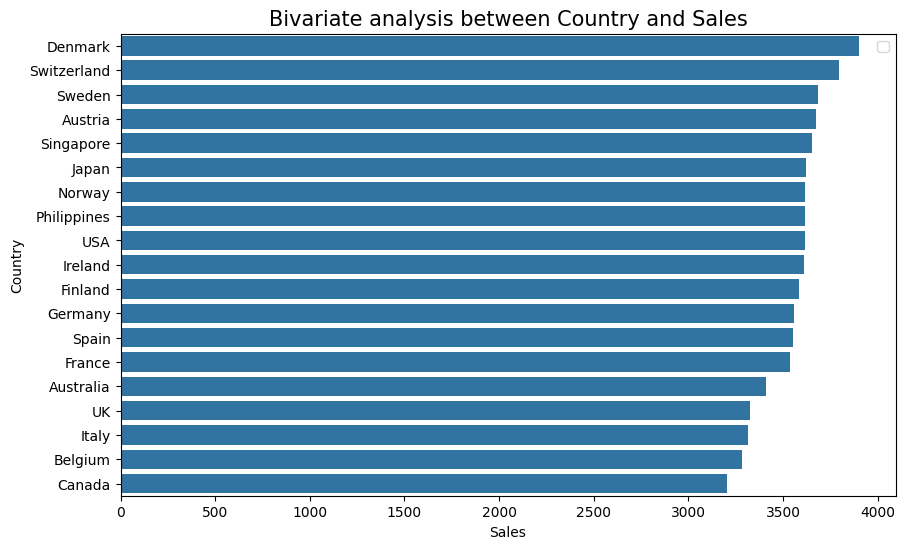

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


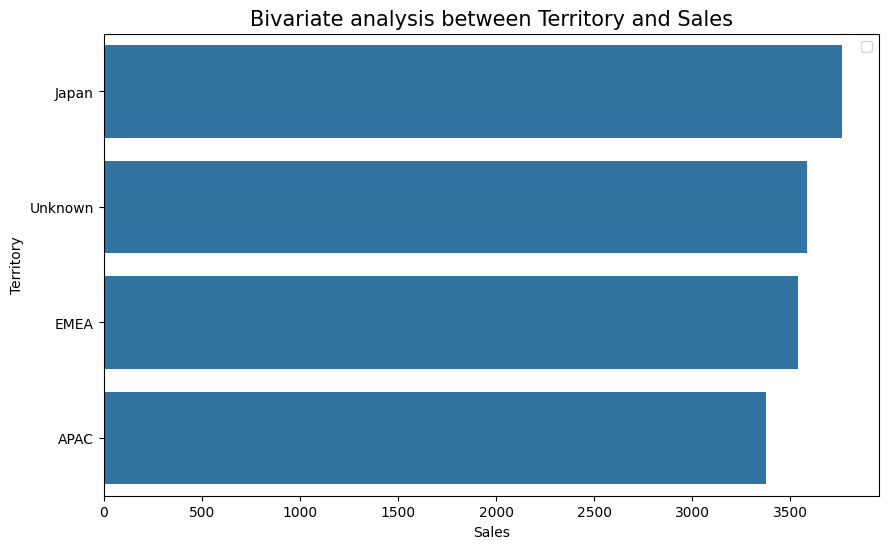

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


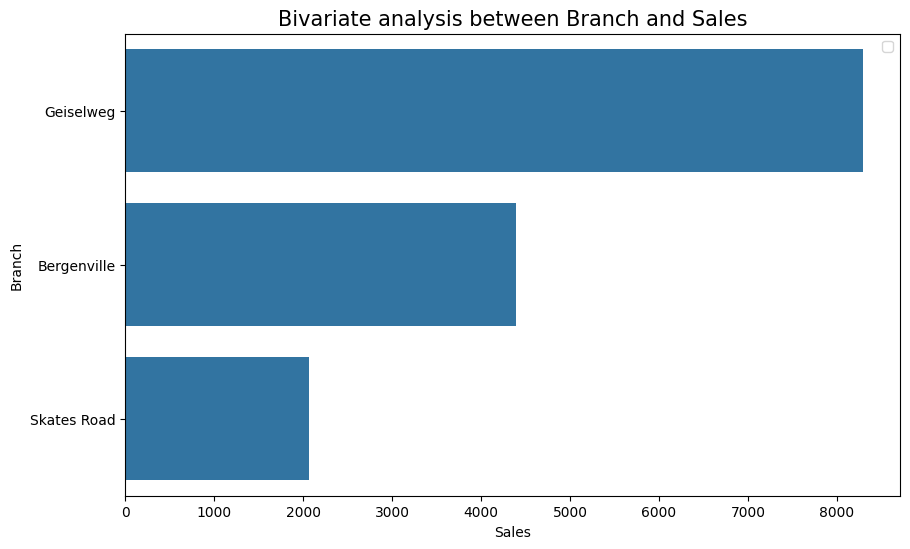

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


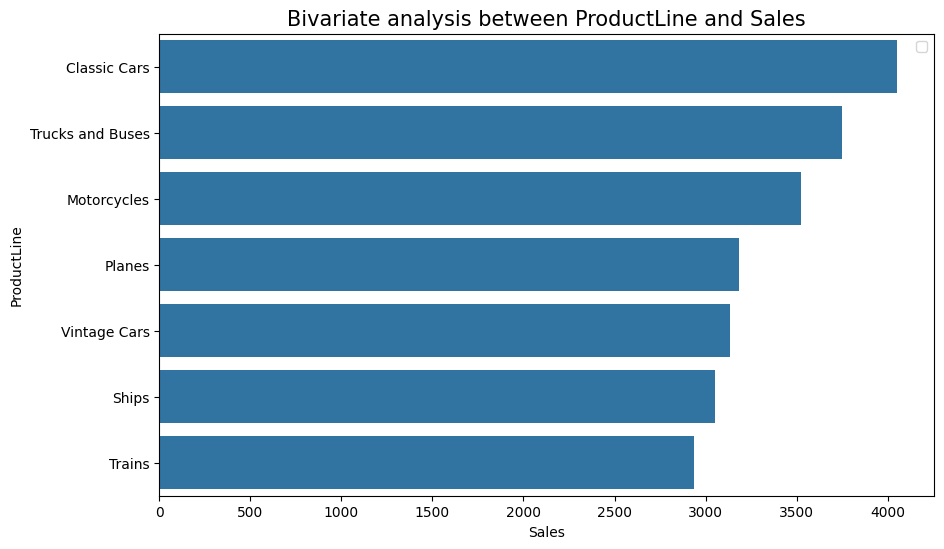

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3446123629.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


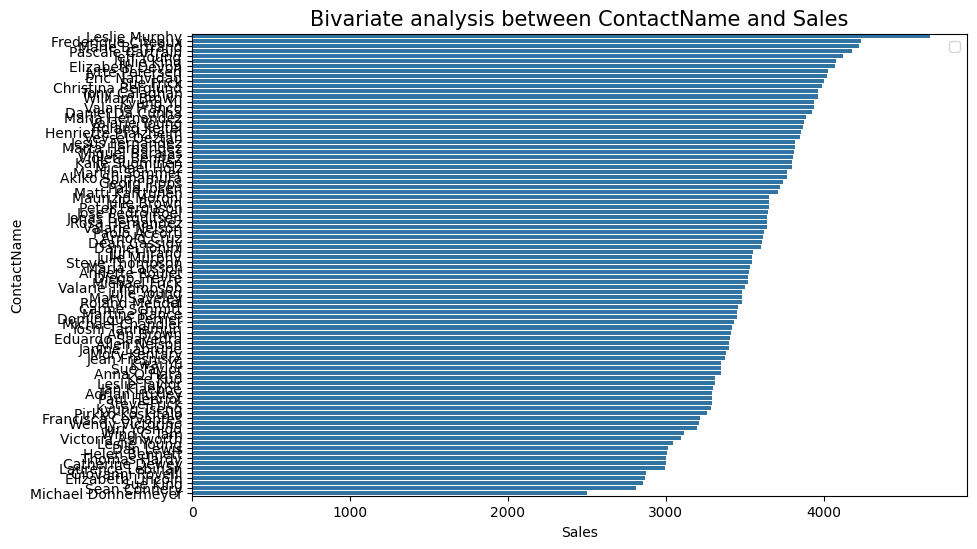

In [39]:
# bivariate analysis between the target variable and the categorical columns
#write a function to plot the bivariate analysis between the target variable and the categorical columns
def categorical_bivariate(column):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combined_data, x='Sales', y=column, ci=None, order=combined_data.groupby(column)['Sales'].mean().sort_values(ascending=False).index)
    plt.title(f'Bivariate analysis between {column} and Sales', fontsize=15)
    plt.ylabel(column)
    plt.xlabel('Sales')
    plt.legend()
    plt.show()

#apply the function to the categorical columns
for column in categorical_columns:
    categorical_bivariate(column)


### QuantityOrdered

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\450485126.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


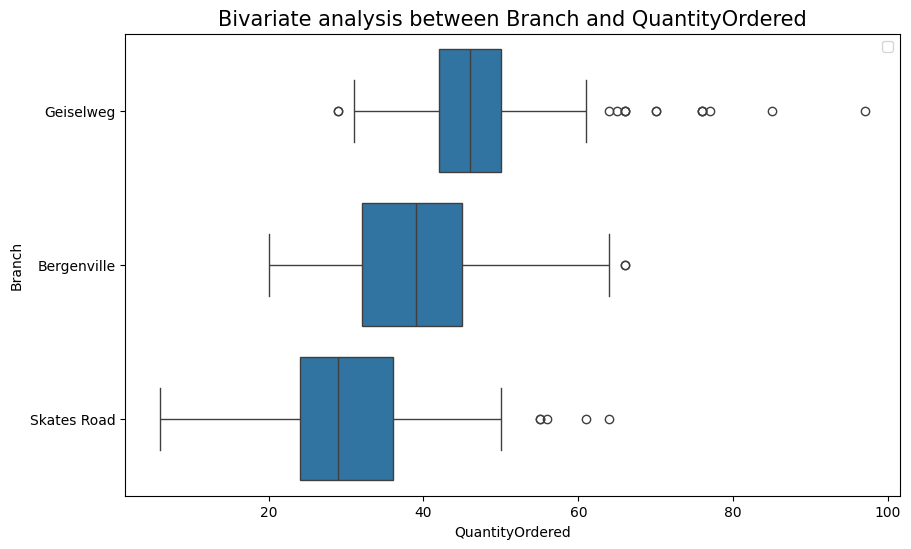

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\450485126.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


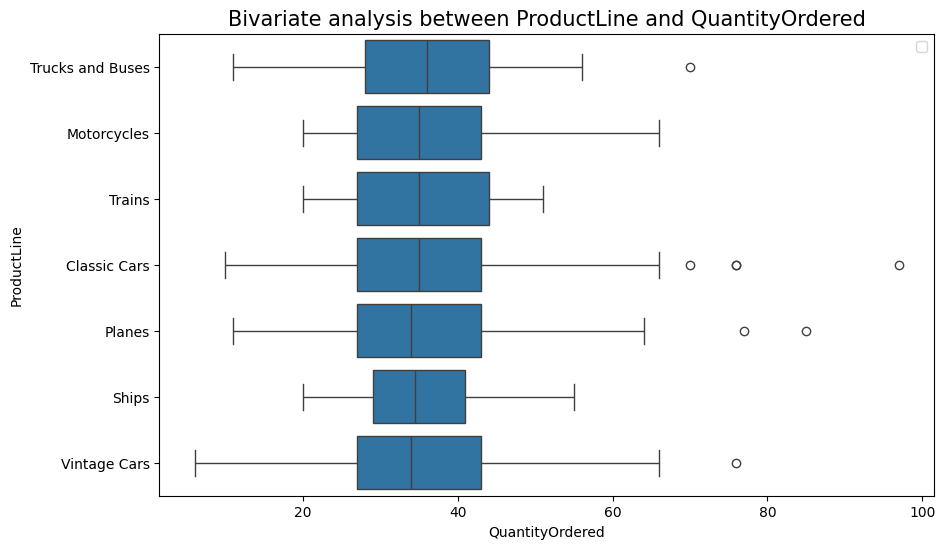

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\450485126.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


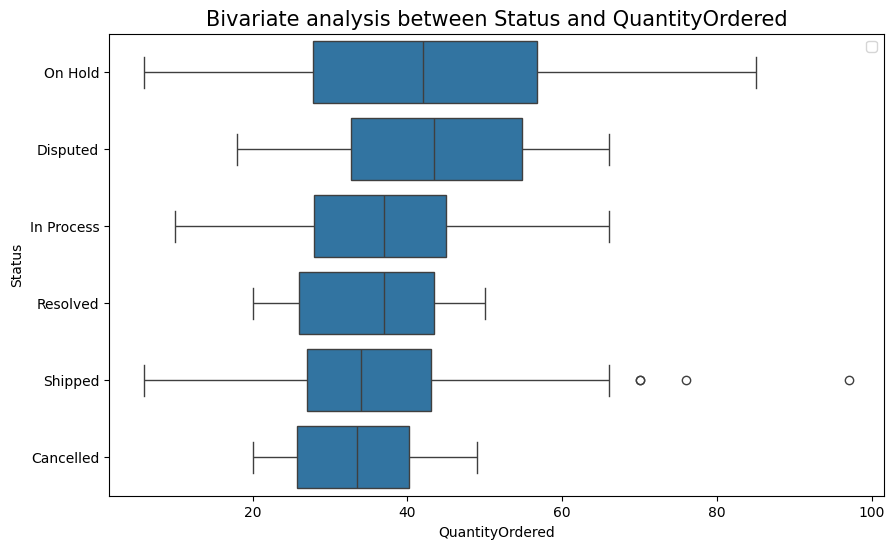

In [40]:
#bivariate analysis between categorical columns and Quantity Ordered
cat_columns = ['Branch','ProductLine', 'Status']
for column in cat_columns:
    plt.figure (figsize=(10,6))
    sns.boxplot(data=combined_data, x='QuantityOrdered', y=column, order=combined_data.groupby(column)['QuantityOrdered'].mean().sort_values(ascending=False).index)
    plt.title(f'Bivariate analysis between {column} and QuantityOrdered', fontsize=15)
    plt.ylabel(column)
    plt.xlabel('QuantityOrdered')
    plt.legend()
    plt.show()



### PriceEach 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2751553713.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


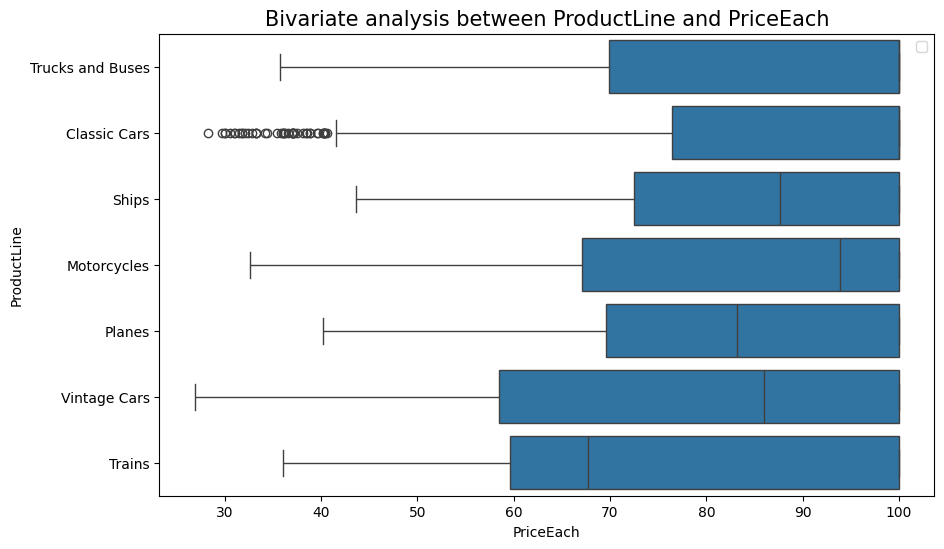

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2751553713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


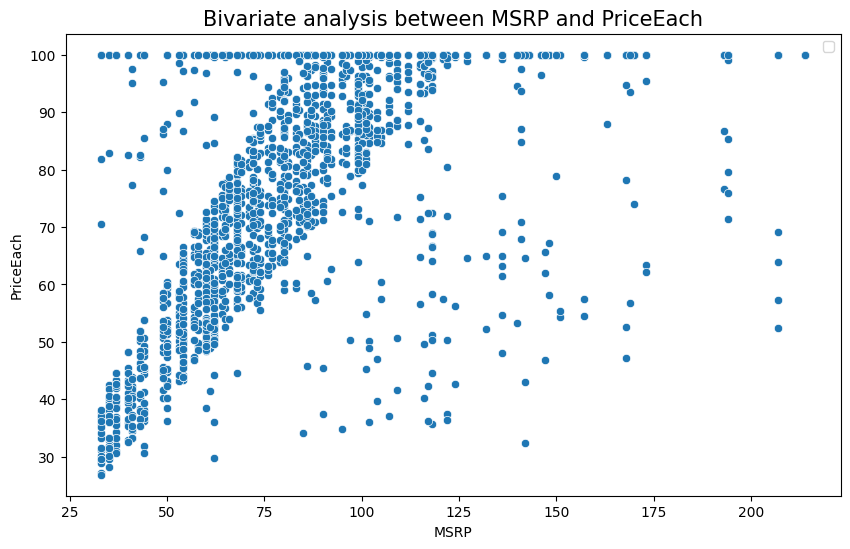

In [41]:
#bivariate analysis between columns and Price Each
#plot a box plot between product line and price each
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='PriceEach', y='ProductLine', order=combined_data.groupby('ProductLine')['PriceEach'].mean().sort_values(ascending=False).index)
plt.title('Bivariate analysis between ProductLine and PriceEach', fontsize=15)
plt.ylabel('ProductLine')
plt.xlabel('PriceEach')
plt.legend()
plt.show()


#plot a scatter plot between MSRP and PriceEach
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='MSRP', y='PriceEach')
plt.title('Bivariate analysis between MSRP and PriceEach', fontsize=15)
plt.ylabel('PriceEach')
plt.xlabel('MSRP')
plt.legend()
plt.show()




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2644523993.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


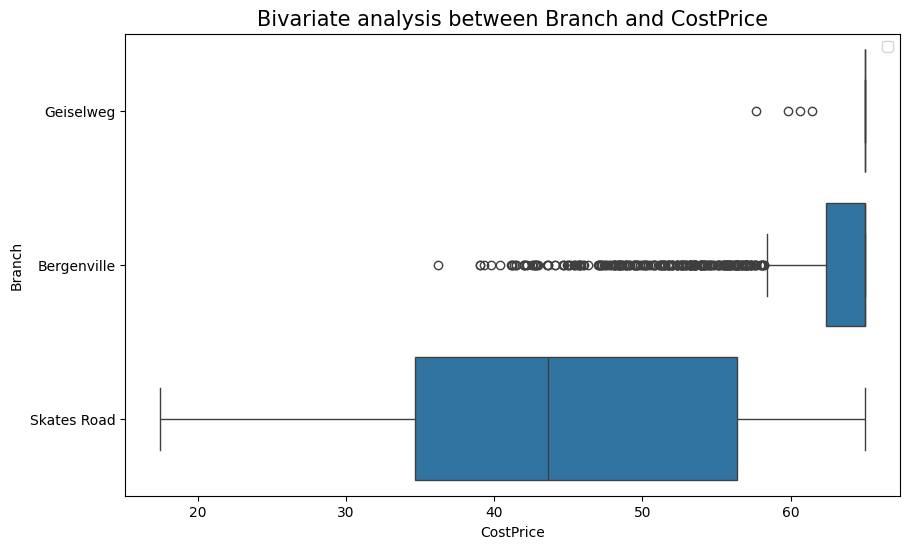

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2644523993.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


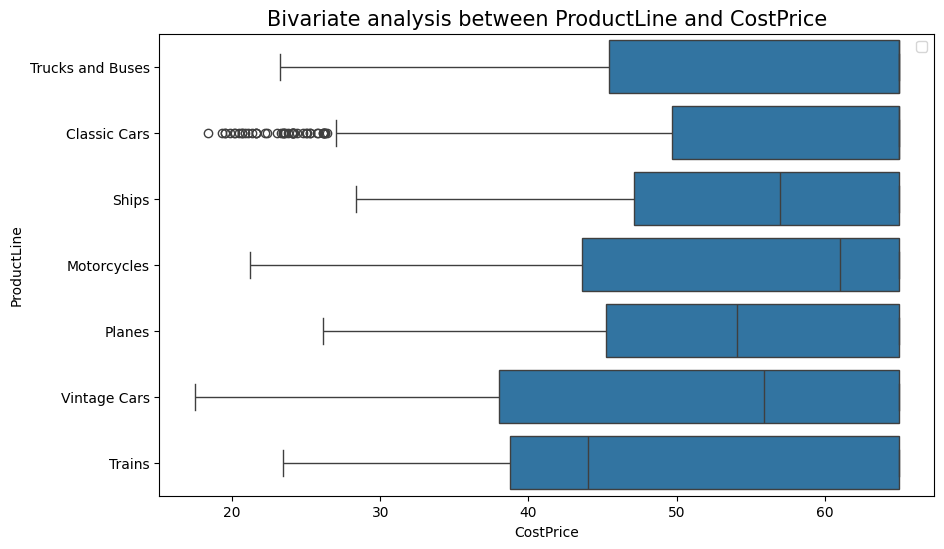

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2644523993.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


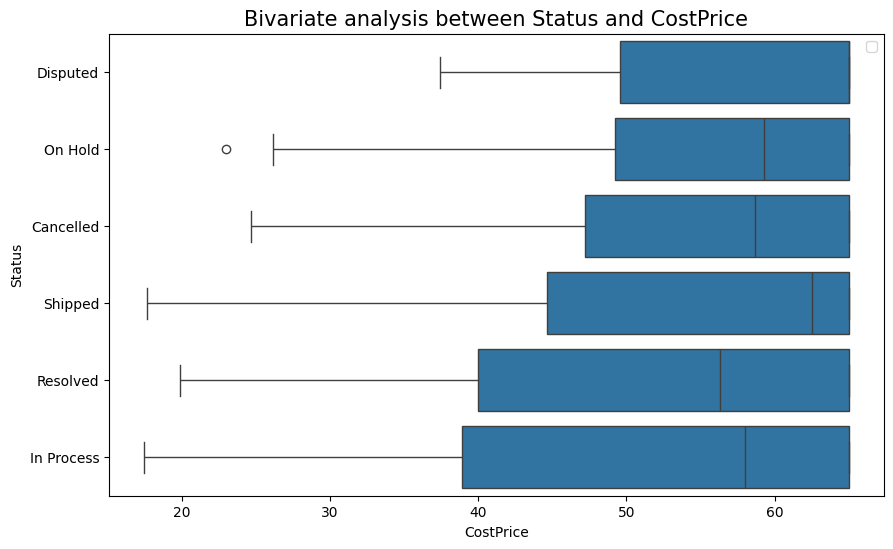

In [42]:
#bivariate analysis between CostPrice and columns
for column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='CostPrice', y=column, order=combined_data.groupby(column)['CostPrice'].mean().sort_values(ascending=False).index)
    plt.title(f'Bivariate analysis between {column} and CostPrice', fontsize=15)
    plt.ylabel(column)
    plt.xlabel('CostPrice')
    plt.legend()
    plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2614096547.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


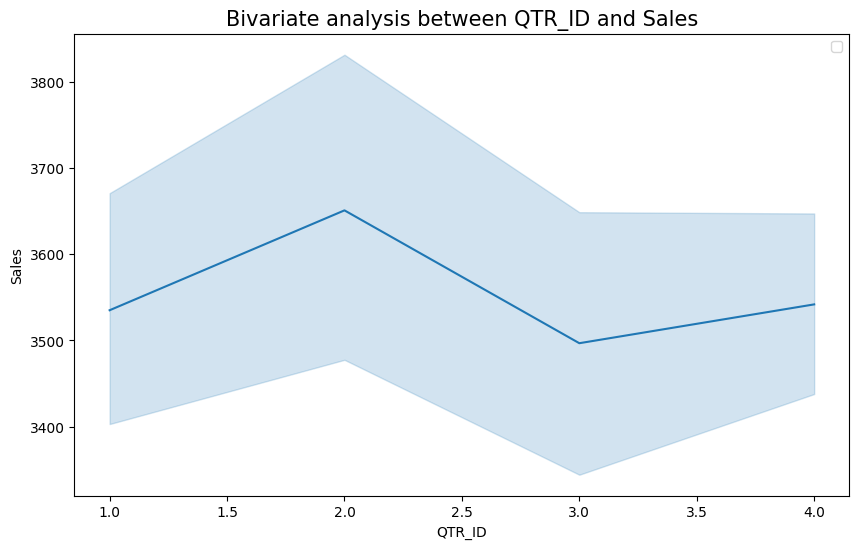

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2614096547.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


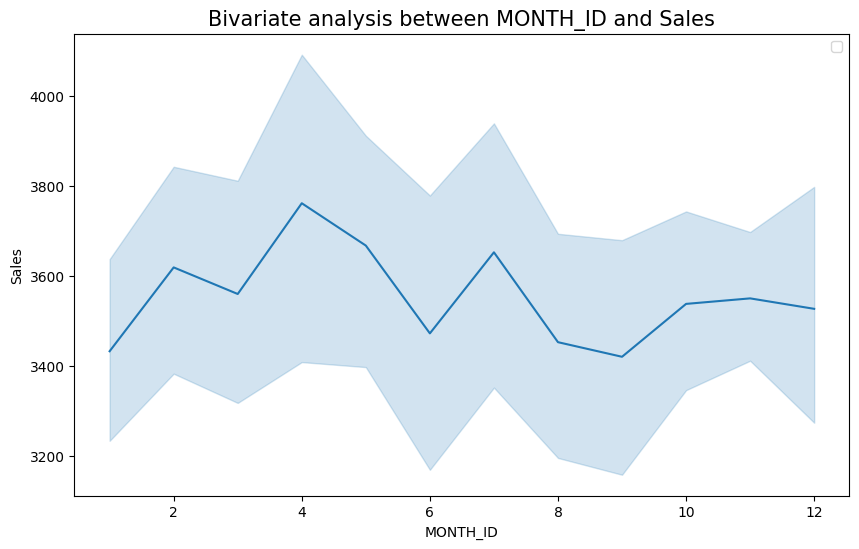

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2614096547.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


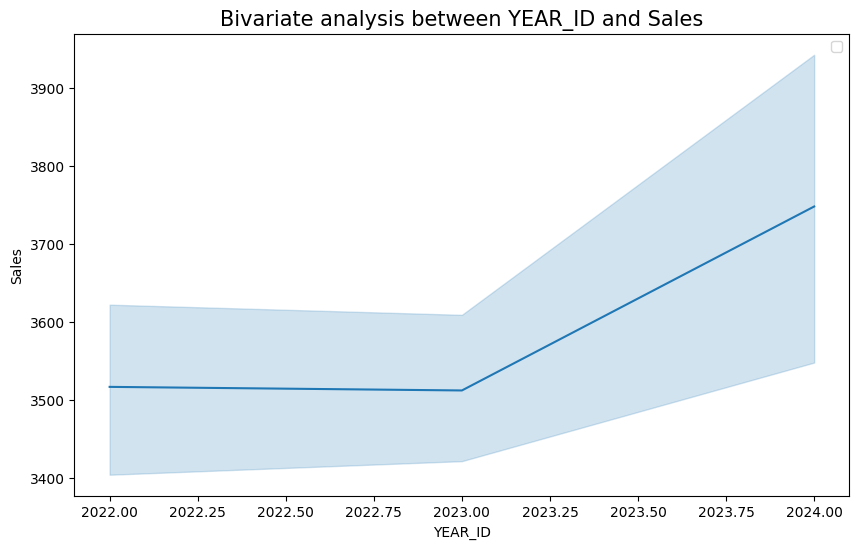

In [43]:
#bivariate analysis between month, year and quarter with sales
time_columns = ['QTR_ID', 'MONTH_ID', 'YEAR_ID']
for column in time_columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=combined_data, x=column, y='Sales')
    plt.title(f'Bivariate analysis between {column} and Sales', fontsize=15)
    plt.ylabel('Sales')
    plt.xlabel(column)
    plt.legend()
    plt.show()
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2828881816.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


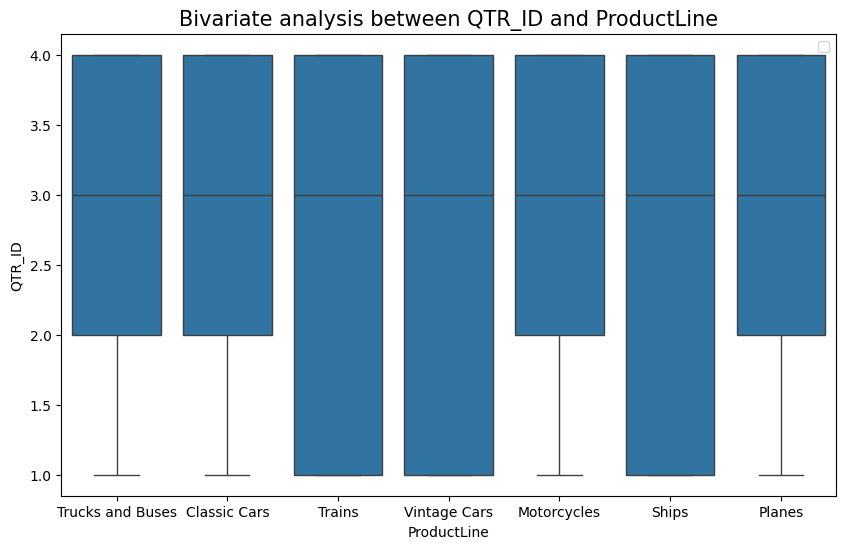

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2828881816.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


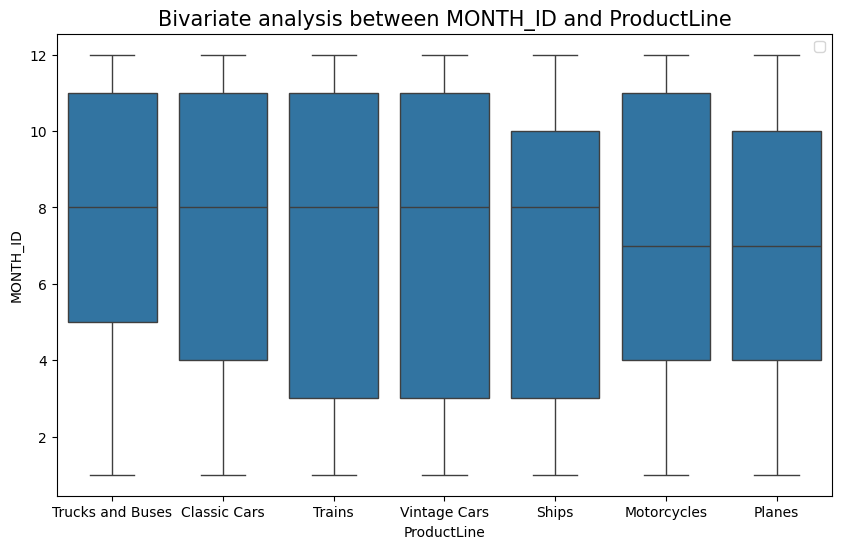

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2828881816.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


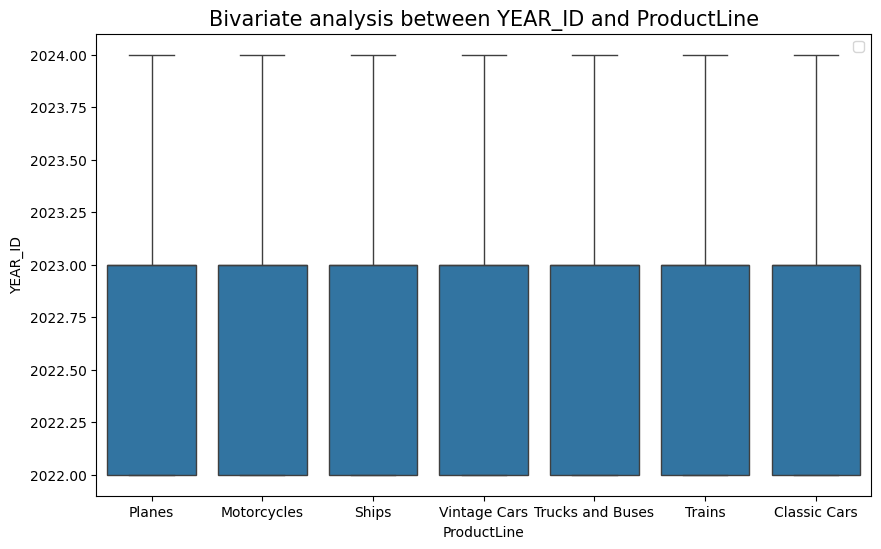

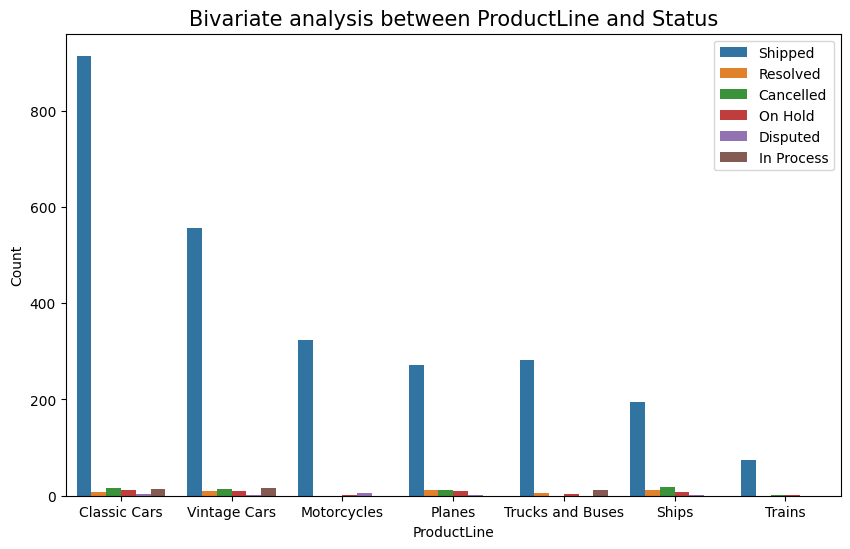

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2828881816.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


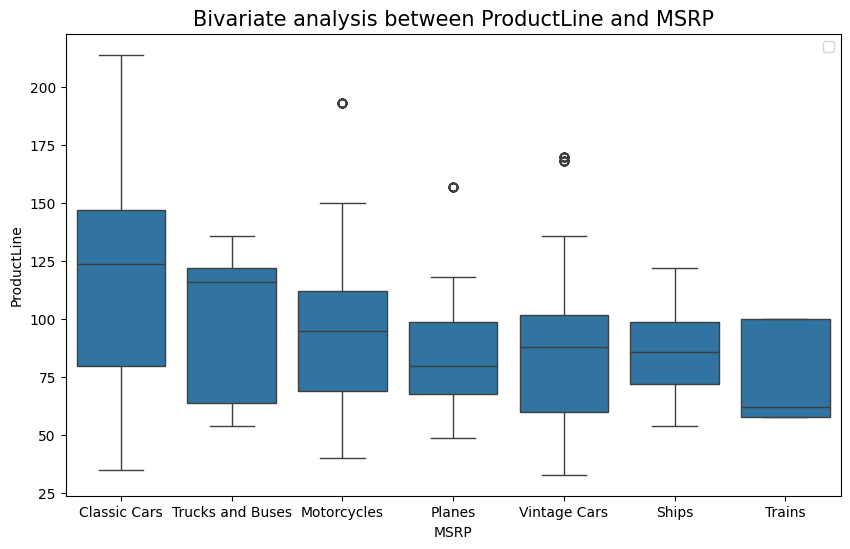

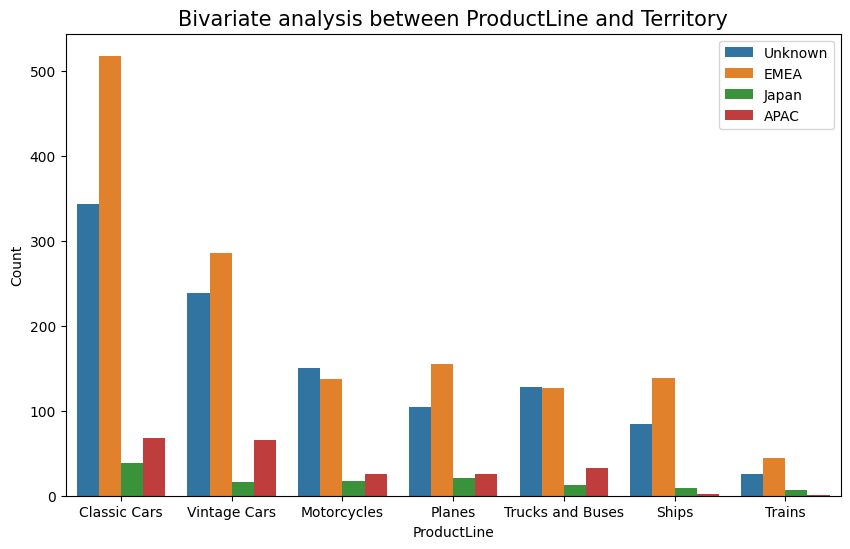

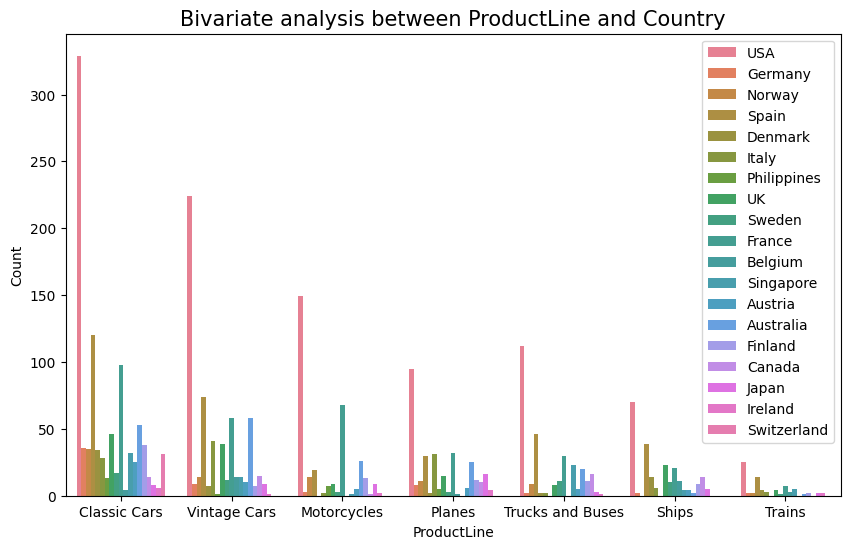

In [44]:
#bivariate analysis between month, year, quarter, status, MSRP with ProductLine
for column in time_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='ProductLine', y=column, order=combined_data.groupby('ProductLine')[column].mean().sort_values(ascending=False).index)
    plt.title(f'Bivariate analysis between {column} and ProductLine', fontsize=15)
    plt.ylabel(column)
    plt.xlabel('ProductLine')
    plt.legend()
    plt.show()


#bivariate analysis between  status and product line
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='ProductLine', hue='Status', order=combined_data['ProductLine'].value_counts().index)
plt.title('Bivariate analysis between ProductLine and Status', fontsize=15)
plt.ylabel('Count')
plt.xlabel('ProductLine')
plt.legend()
plt.show()

#bivariate analysis between  msrp and product line
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='ProductLine', y='MSRP', order=combined_data.groupby('ProductLine')['MSRP'].mean().sort_values(ascending=False).index)
plt.title('Bivariate analysis between ProductLine and MSRP', fontsize=15)
plt.ylabel('ProductLine')
plt.xlabel('MSRP')
plt.legend()
plt.show()

#bivariate analysis between product line and territory
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='ProductLine', hue='Territory', order=combined_data['ProductLine'].value_counts().index)
plt.title('Bivariate analysis between ProductLine and Territory', fontsize=15)
plt.ylabel('Count')
plt.xlabel('ProductLine')
plt.legend()
plt.show()

#bivariate analysis between product line and country
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='ProductLine', hue='Country', order=combined_data['ProductLine'].value_counts().index)
plt.title('Bivariate analysis between ProductLine and Country', fontsize=15)
plt.ylabel('Count')
plt.xlabel('ProductLine')
plt.legend()
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3152952721.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


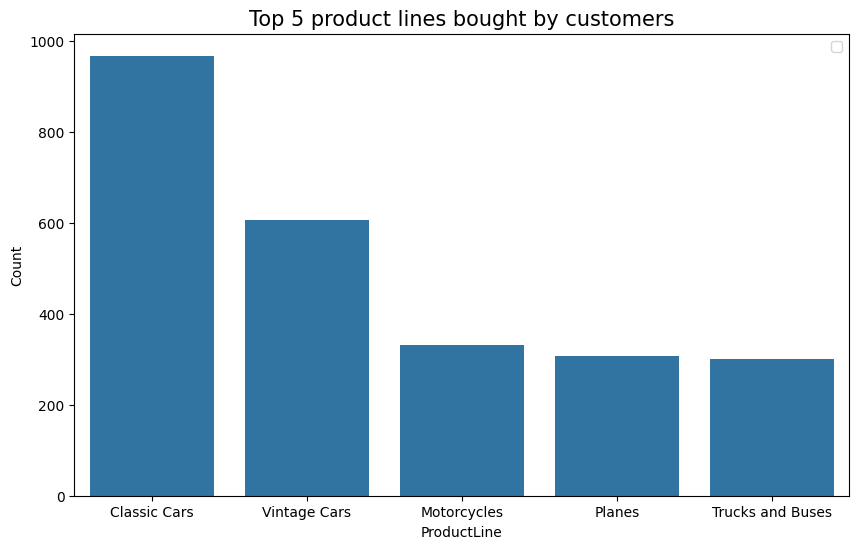

In [46]:
#TOP 3 product lines bought by customers
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='ProductLine', order=combined_data['ProductLine'].value_counts().index[:5])
plt.title('Top 5 product lines bought by customers', fontsize=15)
plt.ylabel('Count')
plt.xlabel('ProductLine')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2014419986.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



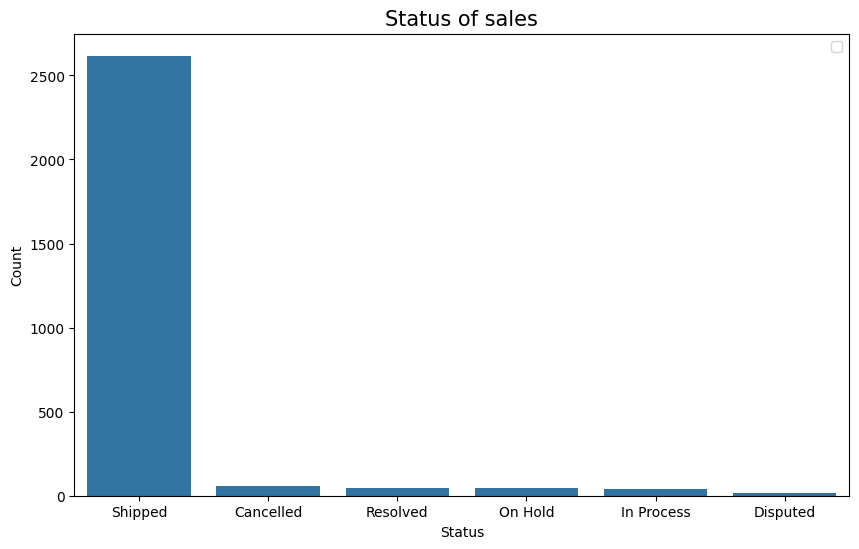

In [49]:
#check the data groupby sales in different status
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='Status', order=combined_data['Status'].value_counts().index)
plt.title('Status of sales', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Status')
plt.legend()
plt.show()


In [54]:
#we want to see which product line has the highest number in process, on hold, disputed,cancelled, resolved and shipped
# Group by ProductLine and Status, then count occurrences
status_counts = combined_data.groupby(['ProductLine', 'Status']).size().unstack(fill_value=0)

# Display the result
print(status_counts) 


Status            Cancelled  Disputed  In Process  On Hold  Resolved  Shipped
ProductLine                                                                  
Classic Cars             16         3          14       12         8      914
Motorcycles               0         6           0        1         0      324
Planes                   12         2           0        9        12      271
Ships                    18         1           0        8        12      195
Trains                    1         0           0        1         0       75
Trucks and Buses          0         0          11        4         5      281
Vintage Cars             13         2          16        9        10      557


- Ships are being cancelled a lot while also not being shipped a lot. Identify what the problem could be.
- Classical Cars are being cancelled bt still be shipped so that's in order.


In [64]:
#do the same for customers 
#Calculate total sales for each customer
customer_sales = combined_data.groupby('CustomerName')['Sales'].sum()

#identify the top 20 and bottom 20 customers using the total sales
top_20_customers = customer_sales.sort_values(ascending=False).head(20)
bottom_20_customers = customer_sales.sort_values(ascending=True).head(20)

#filter the dataframe  to get the top 20 and bottom 20 customers
top_customers = combined_data[combined_data['CustomerName'].isin(top_20_customers.index)]
bottom_customers = combined_data[combined_data['CustomerName'].isin(bottom_20_customers.index)]

#group by customer name and status
top_customers_status = top_customers.groupby(['CustomerName', 'Status']).size().unstack(fill_value=0)
bottom_customers_status = bottom_customers.groupby(['CustomerName', 'Status']).size().unstack(fill_value=0)

#display the result
top_customers_status


Status                        Cancelled  Disputed  In Process  On Hold  \
CustomerName                                                             
AV Stores  Co.                        0         0           0        0   
Anna s Decorations  Ltd               0         0           0        0   
Australian Collectors  Co.            0         0           0        0   
Corporate Gift Ideas Co.              0         0           0        0   
Danish Wholesale Imports              0         3           0        0   
Dragon Souveniers  Ltd.               0         0           0        0   
Euro Shopping Channel                16         6           6        0   
L ordine Souveniers                   0         0           0        0   
La Rochelle Gifts                     0         0          13        0   
Land of Toys Inc.                    14         0           0        0   
Mini Gifts Distributors Ltd.          0         0           2        0   
Muscle Machine Inc                    0         0           0        0   
Online Diecast Creations Co.          0         0           0        0   
Reims Collectables                    0         0           0        0   
Rovelli Gifts                         0         0           0        0   
Salzburg Collectables                 0         0           0        0   
Saveley & Henriot  Co.                0         0           0        0   
Scandinavian Gift Ideas              16         0           0        0   
Souveniers And Things Co.             0         0          13        0   
The Sharp Gifts Warehouse             0         0           0       12   

Status                        Resolved  Shipped  
CustomerName                                     
AV Stores  Co.                       0       51  
Anna s Decorations  Ltd              0       46  
Australian Collectors  Co.           0       55  
Corporate Gift Ideas Co.             0       41  
Danish Wholesale Imports             8       25  
Dragon Souveniers  Ltd.              0       43  
Euro Shopping Channel               18      213  
L ordine Souveniers                  0       39  
La Rochelle Gifts                    0       40  
Land of Toys Inc.                    0       35  
Mini Gifts Distributors Ltd.         0      178  
Muscle Machine Inc                   0       48  
Online Diecast Creations Co.         0       34  
Reims Collectables                   0       41  
Rovelli Gifts                        0       48  
Salzburg Collectables                0       40  
Saveley & Henriot  Co.               0       41  
Scandinavian Gift Ideas              0       22  
Souveniers And Things Co.            0       33  
The Sharp Gifts Warehouse            0       28

In [67]:
#confirm that the customer  name in top_customers_status is in the top 20 customers with the highest sales
top_customers_status.index.isin(top_20_customers.index).all()

True

In [78]:
customer_sales.sort_values(ascending=False).head(20)

CustomerName
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors  Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers  Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores  Co.                  157807.81
Anna s Decorations  Ltd         153996.13
Souveniers And Things Co.       151570.98
Corporate Gift Ideas Co.        149882.50
Salzburg Collectables           149798.63
Danish Wholesale Imports        145041.60
Saveley & Henriot  Co.          142874.25
L ordine Souveniers             142601.33
Rovelli Gifts                   137955.72
Reims Collectables              135042.94
Scandinavian Gift Ideas         134259.33
Online Diecast Creations Co.    131685.30
Name: Sales, dtype: float64

In [86]:
customer_sales.sort_values(ascending=True).head(20)

CustomerName
Boards & Toys Co.                      9129.35
Atelier graphique                     24179.96
Auto-Moto Classics Inc.               26479.26
Microscale Inc.                       33144.93
Royale Belge                          33440.10
Bavarian Collectables Imports  Co.    34993.92
Double Decker Gift Stores  Ltd        36019.04
Cambridge Collectables Co.            36163.62
West Coast Collectables Co.           46084.64
Men  R  US Retailers  Ltd.            48048.46
CAF Imports                           49642.05
Signal Collectibles Ltd.              50218.51
Mini Auto Werke                       52263.90
Iberia Gift Imports  Corp.            54723.62
Online Mini Collectables              57197.96
Gift Ideas Corp.                      57294.42
Clover Collections  Co.               57756.43
Australian Gift Network  Co           59469.12
Australian Collectables  Ltd          64591.46
Auto Assoc. & Cie.                    64834.32
Name: Sales, dtype: float64

In [70]:
bottom_customers_status

Status                              Disputed  Resolved  Shipped
CustomerName                                                   
Atelier graphique                          0         0        7
Australian Collectables  Ltd               5         0       18
Australian Gift Network  Co                0         0       15
Auto Assoc. & Cie.                         0         0       18
Auto-Moto Classics Inc.                    0         0        8
Bavarian Collectables Imports  Co.         0         0       14
Boards & Toys Co.                          0         0        3
CAF Imports                                0         0       13
Cambridge Collectables Co.                 0         0       11
Clover Collections  Co.                    0         0       16
Double Decker Gift Stores  Ltd             0         0       12
Gift Ideas Corp.                           0         0       19
Iberia Gift Imports  Corp.                 0         0       15
Men  R  US Retailers  Ltd.                 0         0       14
Microscale Inc.                            0         0       10
Mini Auto Werke                            0         8        7
Online Mini Collectables                   0         0       15
Royale Belge                               0         0        8
Signal Collectibles Ltd.                   0         0       15
West Coast Collectables Co.                0         0       13

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3266130375.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3266130375.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



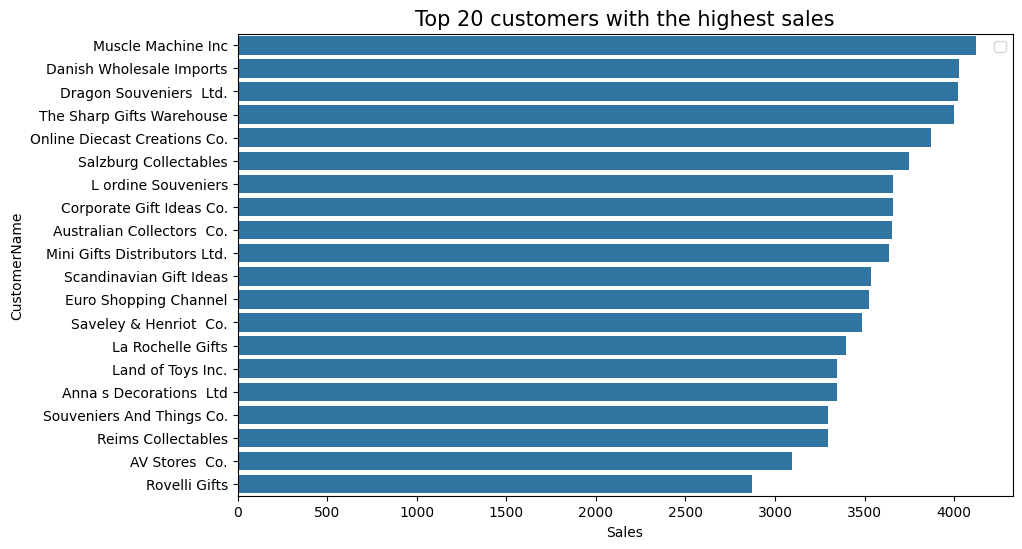

In [96]:
#plot the top 20 customers with the highest sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Sales', y='CustomerName', ci=None, order=top_customers.groupby('CustomerName')['Sales'].mean().sort_values(ascending=False).index)
plt.title('Top 20 customers with the highest sales', fontsize=15)
plt.ylabel('CustomerName')
plt.xlabel('Sales')
plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3341863590.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3341863590.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



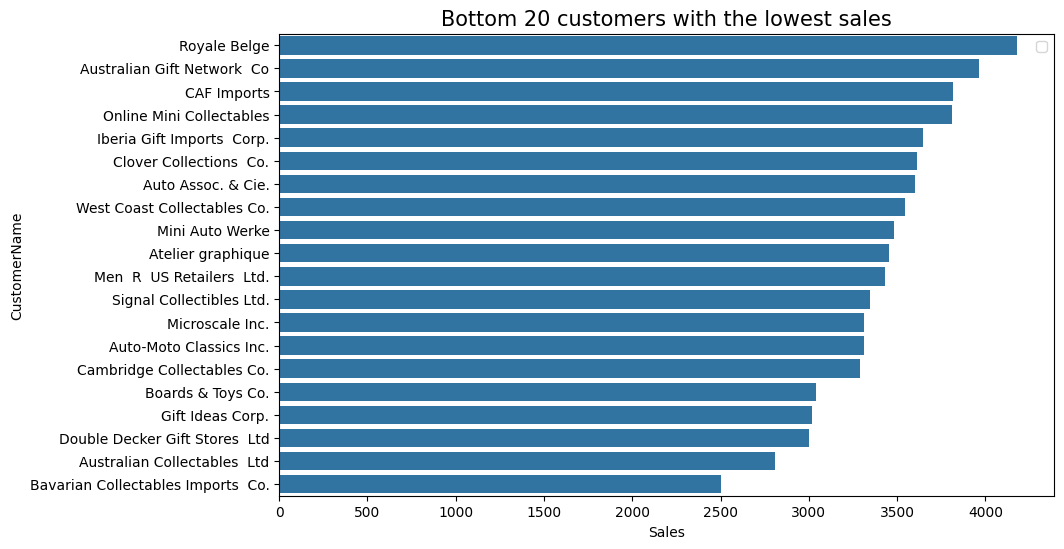

In [95]:

#bottom 20 customers with the lowest sales
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_customers, x='Sales', y='CustomerName', ci=None, order=bottom_customers.groupby('CustomerName')['Sales'].mean().sort_values(ascending=False).index)
plt.title('Bottom 20 customers with the lowest sales', fontsize=15)
plt.ylabel('CustomerName')
plt.xlabel('Sales')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1399788411.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



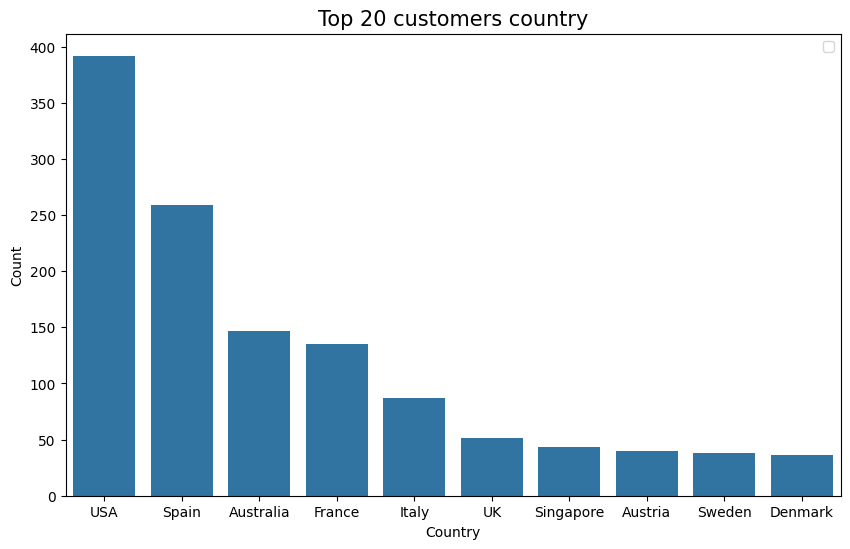

In [100]:
#country and territory of the top 20 customers and bottom 20 customers
#PLOT THE TOP 20 CUSTOMERS COUNTRY 
plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers, x='Country', order=top_customers['Country'].value_counts().index)
plt.title('Top 20 customers country', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Country')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2610420713.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



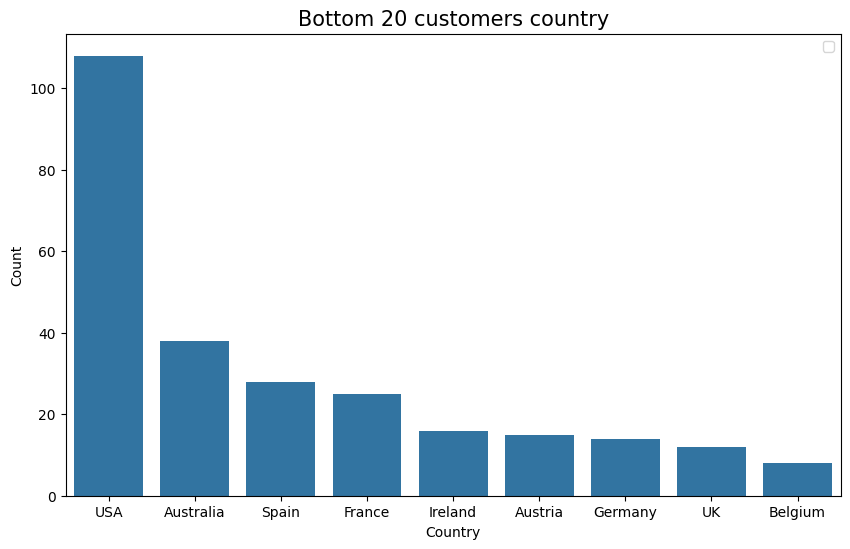

In [101]:
#PLOT THE BOTTOM 20 CUSTOMERS COUNTRY
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_customers, x='Country', order=bottom_customers['Country'].value_counts().index)
plt.title('Bottom 20 customers country', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Country')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\1343049237.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



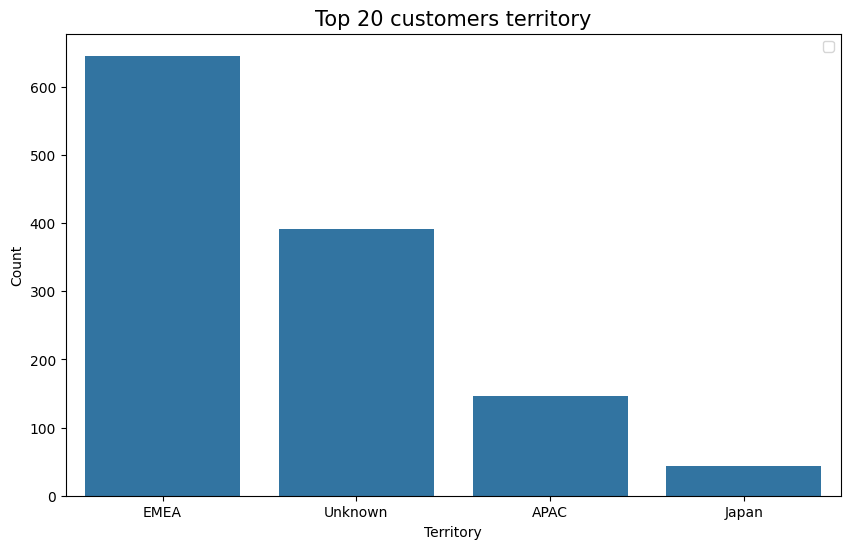

In [102]:
#TOP 20 CUSTOMERS TERRITORY
plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers, x='Territory', order=top_customers['Territory'].value_counts().index)
plt.title('Top 20 customers territory', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Territory')
plt.legend()
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3240438650.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



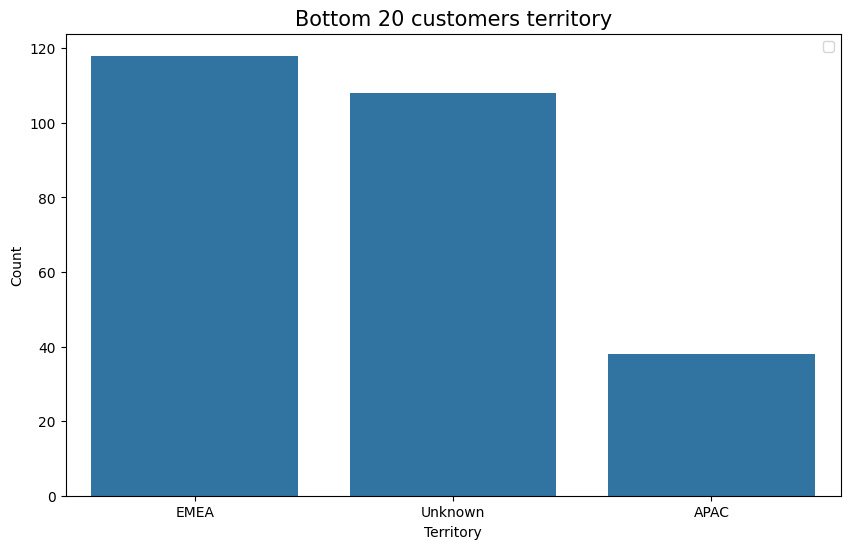

In [103]:
#BOTTOM 20 CUSTOMERS TERRITORY
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_customers, x='Territory', order=bottom_customers['Territory'].value_counts().index)
plt.title('Bottom 20 customers territory', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Territory')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\4268275563.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



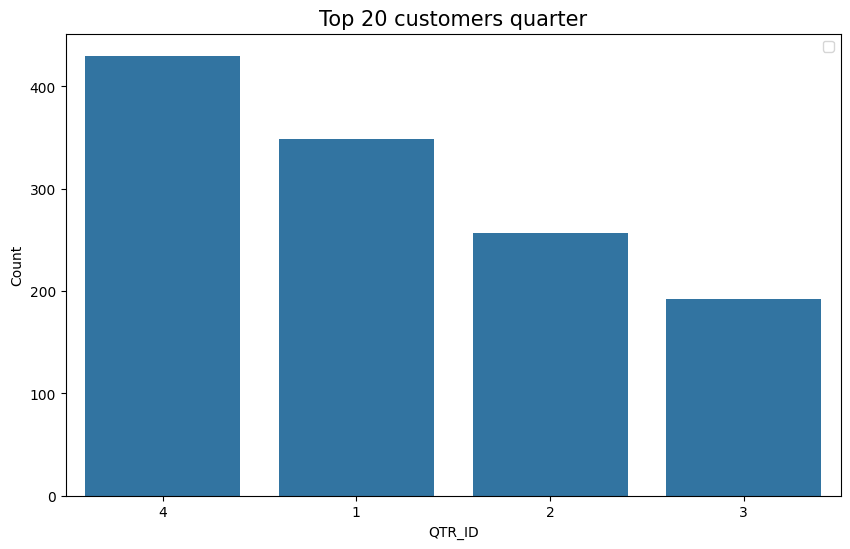

In [104]:
#which quarter, month and year do these customers make the most purchases
#top 20 customers
#QUARTER
plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers, x='QTR_ID', order=top_customers['QTR_ID'].value_counts().index)
plt.title('Top 20 customers quarter', fontsize=15)
plt.ylabel('Count')
plt.xlabel('QTR_ID')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2976392687.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



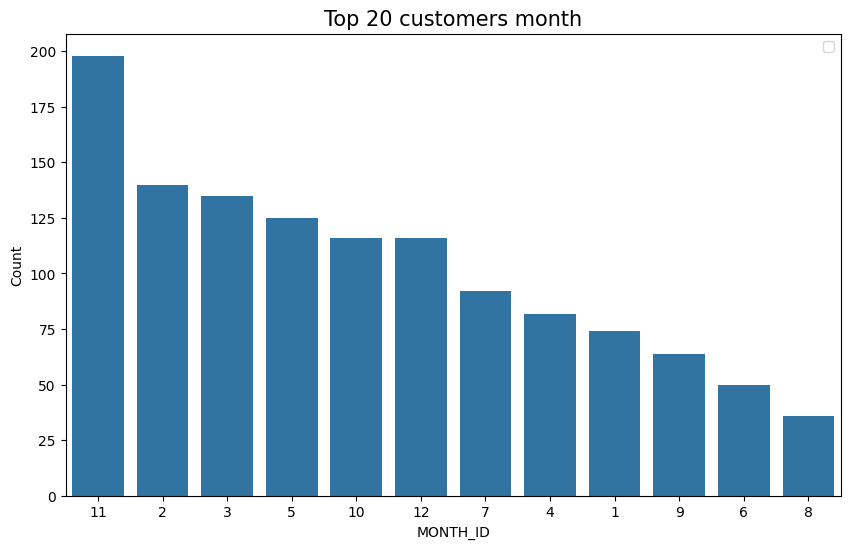

In [105]:
#MONTH
plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers, x='MONTH_ID', order=top_customers['MONTH_ID'].value_counts().index)
plt.title('Top 20 customers month', fontsize=15)
plt.ylabel('Count')
plt.xlabel('MONTH_ID')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\723967891.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



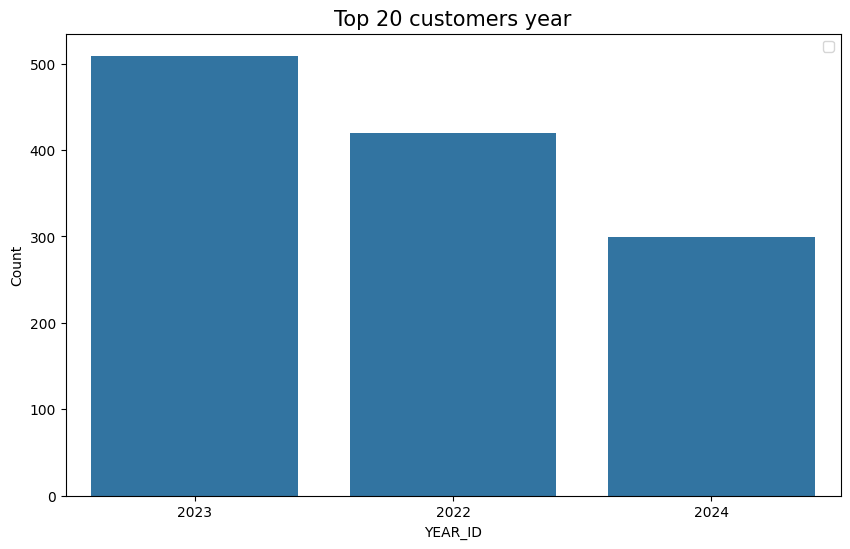

In [106]:
#YEAR
plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers, x='YEAR_ID', order=top_customers['YEAR_ID'].value_counts().index)
plt.title('Top 20 customers year', fontsize=15)
plt.ylabel('Count')
plt.xlabel('YEAR_ID')
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\2092720799.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



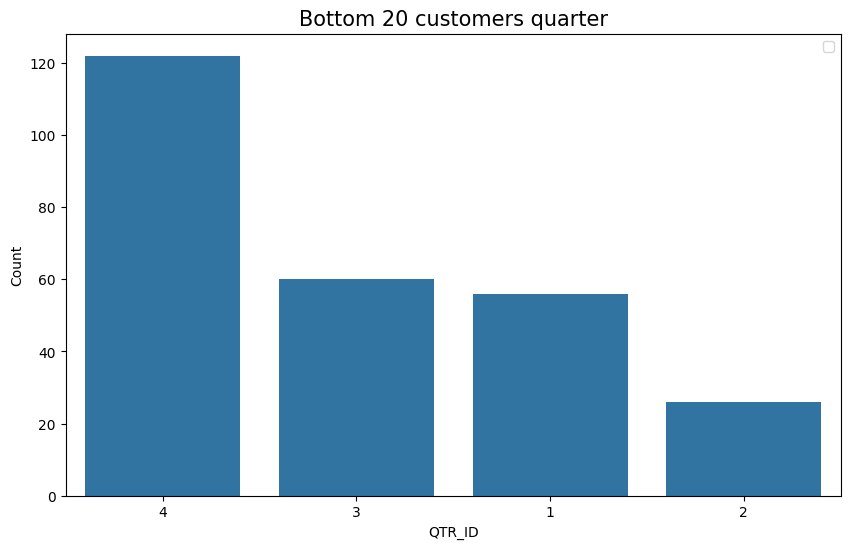

In [107]:
#bottom 20 customers
#QUARTER
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_customers, x='QTR_ID', order=bottom_customers['QTR_ID'].value_counts().index)
plt.title('Bottom 20 customers quarter', fontsize=15)
plt.ylabel('Count')
plt.xlabel('QTR_ID')
plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\281879414.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



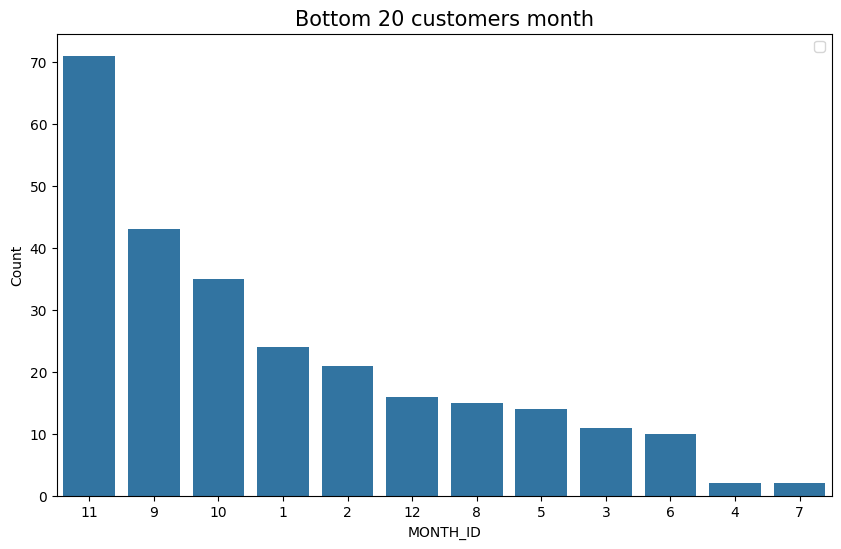

In [108]:
#MONTH
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_customers, x='MONTH_ID', order=bottom_customers['MONTH_ID'].value_counts().index)
plt.title('Bottom 20 customers month', fontsize=15)
plt.ylabel('Count')
plt.xlabel('MONTH_ID')
plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24456\3004605263.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



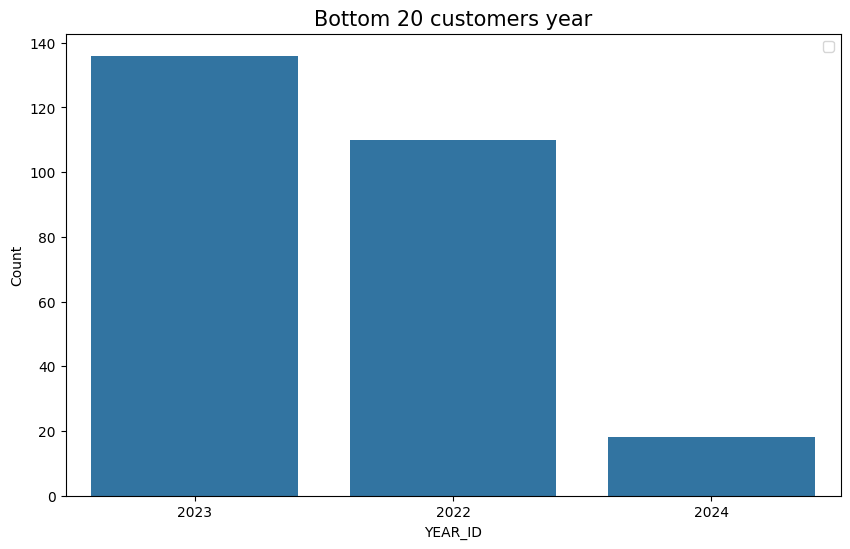

In [109]:
#YEAR
plt.figure(figsize=(10, 6))
sns.countplot(data=bottom_customers, x='YEAR_ID', order=bottom_customers['YEAR_ID'].value_counts().index)
plt.title('Bottom 20 customers year', fontsize=15)
plt.ylabel('Count')
plt.xlabel('YEAR_ID')
plt.legend()
plt.show()